# Caso de estudio - Aprendizaje supervisado

In [1]:
#Integrantes: Yulianny Alvarez, Jorge Rodriguez, Juan Pablo Ramirez, Esteban Caro

**Objetivo general:** Predecir cuáles estudiantes van a reprobar Álgebra lineal e identificar las variables más importantes para llegar a esta conclusión.


# Librerías #

In [2]:
# Importamos las librerias necesarias

## Remove Warnings
import warnings
warnings.filterwarnings("ignore")

## Data
import pandas as pd
import numpy as np

## Country Code
!pip install country_converter
!pip install pycountry_convert
import country_converter as coco
import pycountry_convert as pc

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Modelling
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error, r2_score, classification_report
import math

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 546.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 44.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.1/229.1 kB 18.7 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681833 sha256=0012c1e20950b7e66f394abcaca6fafcce28473f9f8944037ea146cffa5a9f40
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


# Cargar datos

Subimos el dataset a un github y luego leemos la url que almacena los datos para no tener que estar subiendo el dataset directamente desde el ordenador

In [3]:
urlalv = "https://raw.githubusercontent.com/EstebanCaroP/Proyecto-de-Aula/main/algebra_vectorial.csv"

In [4]:
#Utilizamos pandas para leer el dataset importado desde Github
dfav = pd.read_csv(urlalv, index_col=[0])
dfav.head(3)

,departamento,sexo,edad,direccion,t_familia,padres_status,madre_edu,padre_edu,madre_trab,padre_trab,...,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud,ausencias,nota_01,nota_02,nota_03
0,II,M,18,U,mayor_3,S,4,4,en_casa,profesor,...,4,3,4,1,1,3,4,0,11,11
1,II,M,17,U,mayor_3,J,1,1,en_casa,otro,...,5,3,3,1,1,3,2,9,11,11
2,II,M,15,U,menor_e3,J,1,1,en_casa,otro,...,4,3,2,2,3,3,6,12,13,12


Para  evitar que se cree una columna Unamed 0 que no nos da información, ajustamos el parámetro `index_col = [0]` al leer al dataset

# Preparación de los datos

## Análisis Exploratorio

In [5]:
from IPython.display import display, Markdown
pd.set_option('display.max_columns', None)

In [6]:
def check_df(dataframe, head=10):
    display(Markdown('**Dimensiones base general**'))
    display(dataframe.shape)

    display(Markdown('**Número de duplicados**'))
    display(dataframe.duplicated().sum())
    display(dataframe[dataframe.duplicated(keep='last')])
    display(dataframe[dataframe.duplicated(keep='first')])

    display(print(" \n "))

    display(Markdown('**Tipos**'))
    display(dataframe.dtypes)

    display(Markdown('**Primeros Registros**'))
    display(dataframe.head(head))

    display(Markdown('**Nulos**'))
    display(dataframe.isnull().sum())

    display(Markdown('**Percentiles**'))
    display(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_df(dfav)

**Dimensiones base general**

(651, 33)

**Número de duplicados**

2

,departamento,sexo,edad,direccion,t_familia,padres_status,madre_edu,padre_edu,madre_trab,padre_trab,razon,guardian,t_examen,t_estudio,faltas,soporte_edu_extra,soporte_edu_fam,monitores,actividades_extra,preuniversitario,postgrado,internet,relacion_sen,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud,ausencias,nota_01,nota_02,nota_03
0,II,M,18,U,mayor_3,S,4,4,en_casa,profesor,habilidad,madre,2,2,0,si,no,no,no,si,si,no,no,4,3,4,1,1,3,4,0,11,11
424,MS,M,16,R,mayor_3,J,2,2,otro,otro,habilidad,madre,2,2,0,no,si,no,si,si,si,yes,no,4,4,4,1,1,5,0,12,12,12


,departamento,sexo,edad,direccion,t_familia,padres_status,madre_edu,padre_edu,madre_trab,padre_trab,razon,guardian,t_examen,t_estudio,faltas,soporte_edu_extra,soporte_edu_fam,monitores,actividades_extra,preuniversitario,postgrado,internet,relacion_sen,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud,ausencias,nota_01,nota_02,nota_03
649,II,M,18,U,mayor_3,S,4,4,en_casa,profesor,habilidad,madre,2,2,0,si,no,no,no,si,si,no,no,4,3,4,1,1,3,4,0,11,11
650,MS,M,16,R,mayor_3,J,2,2,otro,otro,habilidad,madre,2,2,0,no,si,no,si,si,si,yes,no,4,4,4,1,1,5,0,12,12,12


None

**Tipos**

departamento          object
sexo                  object
edad                   int64
direccion             object
t_familia             object
padres_status         object
madre_edu              int64
padre_edu              int64
madre_trab            object
padre_trab            object
razon                 object
guardian              object
t_examen               int64
t_estudio              int64
faltas                 int64
soporte_edu_extra     object
soporte_edu_fam       object
monitores             object
actividades_extra     object
preuniversitario      object
postgrado             object
internet              object
relacion_sen          object
relacion_fam           int64
tiempo_libre           int64
salir_amigos           int64
cons_alcohol_sem       int64
cons_alcohol_finde     int64
salud                  int64
ausencias              int64
nota_01                int64
nota_02                int64
nota_03                int64
dtype: object

**Primeros Registros**

,departamento,sexo,edad,direccion,t_familia,padres_status,madre_edu,padre_edu,madre_trab,padre_trab,razon,guardian,t_examen,t_estudio,faltas,soporte_edu_extra,soporte_edu_fam,monitores,actividades_extra,preuniversitario,postgrado,internet,relacion_sen,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud,ausencias,nota_01,nota_02,nota_03
0,II,M,18,U,mayor_3,S,4,4,en_casa,profesor,habilidad,madre,2,2,0,si,no,no,no,si,si,no,no,4,3,4,1,1,3,4,0,11,11
1,II,M,17,U,mayor_3,J,1,1,en_casa,otro,habilidad,padre,1,2,0,no,si,no,no,no,si,yes,no,5,3,3,1,1,3,2,9,11,11
2,II,M,15,U,menor_e3,J,1,1,en_casa,otro,otro,madre,1,2,0,si,no,no,no,si,si,yes,no,4,3,2,2,3,3,6,12,13,12
3,II,M,15,U,mayor_3,J,4,2,salud,servicios,recomendacion,madre,1,3,0,no,si,no,si,si,si,yes,yes,3,2,2,1,1,5,0,14,14,14
4,II,M,16,U,mayor_3,J,3,3,otro,otro,recomendacion,padre,1,2,0,no,si,no,no,si,si,no,no,4,3,2,1,2,5,0,11,13,13
5,II,H,16,U,menor_e3,J,4,3,servicios,otro,reputacion,madre,1,2,0,no,si,no,si,si,si,yes,no,5,4,2,1,2,5,6,12,12,13
6,II,H,16,U,menor_e3,J,2,2,otro,otro,recomendacion,madre,1,2,0,no,no,no,no,si,si,yes,no,4,4,4,1,1,3,0,13,12,13
7,II,M,17,U,mayor_3,S,4,4,otro,profesor,recomendacion,madre,2,2,0,si,si,no,no,si,si,no,no,4,1,4,1,1,1,2,10,13,13
8,II,H,15,U,menor_e3,S,3,2,servicios,otro,recomendacion,madre,1,2,0,no,si,no,no,si,si,yes,no,4,2,2,1,1,1,0,15,16,17
9,II,H,15,U,mayor_3,J,3,4,otro,otro,recomendacion,madre,1,2,0,no,si,no,si,si,si,yes,no,5,5,1,1,1,5,0,12,12,13


**Nulos**

departamento          0
sexo                  0
edad                  0
direccion             0
t_familia             0
padres_status         0
madre_edu             0
padre_edu             0
madre_trab            0
padre_trab            0
razon                 0
guardian              0
t_examen              0
t_estudio             0
faltas                0
soporte_edu_extra     0
soporte_edu_fam       0
monitores             0
actividades_extra     0
preuniversitario      0
postgrado             0
internet              0
relacion_sen          0
relacion_fam          0
tiempo_libre          0
salir_amigos          0
cons_alcohol_sem      0
cons_alcohol_finde    0
salud                 0
ausencias             0
nota_01               0
nota_02               0
nota_03               0
dtype: int64

**Percentiles**

,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
edad,651.0,16.745008,1.217609,15.0,15.0,15.0,17.0,19.0,20.0,22.0,22.0
madre_edu,651.0,2.516129,1.134481,0.0,0.0,1.0,2.0,4.0,4.0,4.0,4.0
padre_edu,651.0,2.308756,1.100308,0.0,0.0,1.0,2.0,4.0,4.0,4.0,4.0
t_examen,651.0,1.569892,0.747889,1.0,1.0,1.0,1.0,3.0,4.0,4.0,4.0
t_estudio,651.0,1.930876,0.828241,1.0,1.0,1.0,2.0,4.0,4.0,4.0,4.0
faltas,651.0,0.221198,0.592449,0.0,0.0,0.0,0.0,1.0,3.0,3.0,3.0
relacion_fam,651.0,3.930876,0.954253,1.0,1.0,2.0,4.0,5.0,5.0,5.0,5.0
tiempo_libre,651.0,3.181260,1.049990,1.0,1.0,1.0,3.0,5.0,5.0,5.0,5.0
salir_amigos,651.0,3.187404,1.174824,1.0,1.0,1.0,3.0,5.0,5.0,5.0,5.0
cons_alcohol_sem,651.0,1.500768,0.923830,1.0,1.0,1.0,1.0,4.0,5.0,5.0,5.0


El dataset tiene 651 registros y 34 columnas. También se observa que tenemos dos datos duplicados, los cuales dejaremos incluidos dada la probabilidad de que existan estudiantes que tengan las mismas características. No se tienen nulos en el dataset.

Podemos observar algunas variables numéricas importantes como la edad, con un promedio de 16.7 años para los estudiantes, un promedio del estudiantado de 0.22 faltas lo cual es un buen indicio de la asistencia a la universidad y po último notamos que las notas de los tres parciales gira alrededor de 11 y 12.

In [7]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('##########################################')
    if plot:
        plt.figure(figsize=(12,6))
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

cat_cols = [col for col in dfav.columns if dfav[col].dtypes == "O"]
for col in cat_cols:
    cat_summary(dfav, col, plot=False)

    departamento      Ratio
II           424  65.130568
MS           227  34.869432
##########################################
   sexo      Ratio
M   385  59.139785
H   266  40.860215
##########################################
   direccion      Ratio
U        453  69.585253
R        198  30.414747
##########################################
          t_familia      Ratio
mayor_3         459  70.506912
menor_e3        192  29.493088
##########################################
   padres_status      Ratio
J            570  87.557604
S             81  12.442396
##########################################
           madre_trab      Ratio
otro              259  39.784946
en_casa           136  20.890937
servicios         136  20.890937
profesor           72  11.059908
salud              48   7.373272
##########################################
           padre_trab      Ratio
otro              368  56.528418
servicios         181  27.803379
en_casa            42   6.451613
profesor           37 

En el bloque de código mostrado anteriormente se tiene un resumen de las variables categóricas del dataset. Algunos datos importantes se observan, tales como:

- La mayoría de los estudiantes de la muestra están matriculados en el programa de Ingeniería Industrial (cerca del 65%)
- Cerca del 60% de los estudiantes son mujeres
- El 70% de los estudiantes viven en áreas urbanas y el 30% en áreas rurales.

## Análisis univariado

### Variables Categoricas

In [8]:
print('Variables de los datos: \n')
print(dfav.columns.values)

Variables de los datos: 

['departamento' 'sexo' 'edad' 'direccion' 't_familia' 'padres_status'
 'madre_edu' 'padre_edu' 'madre_trab' 'padre_trab' 'razon' 'guardian'
 't_examen' 't_estudio' 'faltas' 'soporte_edu_extra' 'soporte_edu_fam'
 'monitores' 'actividades_extra' 'preuniversitario' 'postgrado' 'internet'
 'relacion_sen' 'relacion_fam' 'tiempo_libre' 'salir_amigos'
 'cons_alcohol_sem' 'cons_alcohol_finde' 'salud' 'ausencias' 'nota_01'
 'nota_02' 'nota_03']


In [9]:
#Función para encontrar porcentaje de los datos

def proporcion(DataFrame, NameColums, description):
  print('-'*len(description))
  print(description, '\n')

  inte_count = dict(DataFrame[NameColums].value_counts())

  for i in inte_count:
    x = round(inte_count[i]/len(DataFrame[NameColums])*100, 2)
    print("{}: {}%".format(i,x))

  print('-'*len(description))

**Nivel de educación de la madre**

In [10]:
basemadre = dfav.groupby(['madre_edu'])[['sexo']].count().reset_index().sort_values('madre_edu', ascending = True).rename(columns ={'sexo':'count'})
basemadre['madre_edu'] = basemadre['madre_edu'].astype('string')

# crear gráfica
fig = px.bar(basemadre, x='madre_edu', y='count', title ='<b>Nivel de educación de la madre<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'educación de la madre',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Podemos notar en el gráfico de barras que hay una gran diferencia entre las madres que tienen un nivel 0 de educación y los demás niveles, debemos tener en cuenta este desbalance para los próximos análisis.

**Nivel de educación padre**

In [11]:
basepadre = dfav.groupby(['padre_edu'])[['sexo']].count().reset_index().sort_values('sexo', ascending = False).rename(columns ={'sexo':'count'})
basepadre['padre_edu'] = basepadre['padre_edu'].astype('string')

# crear gráfica
fig = px.pie(basepadre, names='padre_edu', values='count', title ='<b>Nivel de educación del padre<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Educación del padre',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Así como en los niveles de educación de la madre, podemos notar que en los niveles de educacion del padre existe un gran desbalance entre el nivel 0 y los demás niveles.

Ya que se evidencia una alta correlación entre las variables madre_edu y padre_edu, debido a que sus gráficos de líneas son bastante similares, (lo evidenciaremos un poco mas adelante en el analisis bivariado con la variable objetivo) y sus niveles van de 0 a 4, se realiza una transformación donde se busca el promedio entre ambas, esta nueva variable la llamaremos padres_edu.

In [12]:
dfav['padres_edu'] = (dfav['madre_edu'] + dfav['padre_edu']) / 2
dfav

,departamento,sexo,edad,direccion,t_familia,padres_status,madre_edu,padre_edu,madre_trab,padre_trab,razon,guardian,t_examen,t_estudio,faltas,soporte_edu_extra,soporte_edu_fam,monitores,actividades_extra,preuniversitario,postgrado,internet,relacion_sen,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud,ausencias,nota_01,nota_02,nota_03,padres_edu
0,II,M,18,U,mayor_3,S,4,4,en_casa,profesor,habilidad,madre,2,2,0,si,no,no,no,si,si,no,no,4,3,4,1,1,3,4,0,11,11,4.0
1,II,M,17,U,mayor_3,J,1,1,en_casa,otro,habilidad,padre,1,2,0,no,si,no,no,no,si,yes,no,5,3,3,1,1,3,2,9,11,11,1.0
2,II,M,15,U,menor_e3,J,1,1,en_casa,otro,otro,madre,1,2,0,si,no,no,no,si,si,yes,no,4,3,2,2,3,3,6,12,13,12,1.0
3,II,M,15,U,mayor_3,J,4,2,salud,servicios,recomendacion,madre,1,3,0,no,si,no,si,si,si,yes,yes,3,2,2,1,1,5,0,14,14,14,3.0
4,II,M,16,U,mayor_3,J,3,3,otro,otro,recomendacion,padre,1,2,0,no,si,no,no,si,si,no,no,4,3,2,1,2,5,0,11,13,13,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,MS,M,18,U,mayor_3,J,1,1,otro,otro,habilidad,madre,2,2,0,no,no,no,si,si,si,no,no,1,1,1,1,1,5,6,11,12,9,1.0
647,MS,H,17,U,menor_e3,J,3,1,servicios,servicios,habilidad,madre,2,1,0,no,no,no,no,no,si,yes,no,2,4,5,3,4,2,6,10,10,10,2.0
648,MS,H,18,R,menor_e3,J,3,2,servicios,otro,habilidad,madre,3,1,0,no,no,no,no,no,si,yes,no,4,4,1,3,4,5,4,10,11,11,2.5
649,II,M,18,U,mayor_3,S,4,4,en_casa,profesor,habilidad,madre,2,2,0,si,no,no,no,si,si,no,no,4,3,4,1,1,3,4,0,11,11,4.0


In [13]:
basepadres = dfav.groupby(['padres_edu'])[['sexo']].count().reset_index().rename(columns ={'sexo':'count'})
basepadres['padres_edu'] = basepadres['padres_edu'].astype('string')

# crear gráfica
fig = px.pie(basepadres, names='padres_edu', values='count', title ='<b>Nivel de educación promedio de los padres<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Promedio educación padres',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Con respecto a la variable de forma independiente, acá vemos un mayor balance entre la educacion promedio de los padres, a excepción de los niveles 0 y 0,5.

**Carrera que cursa el estudiante**

In [14]:
basedepartamento = dfav.groupby(['departamento'])[['sexo']].count().reset_index().rename(columns ={'sexo':'count'})
basedepartamento['departamento'] = basedepartamento['departamento'].astype('string')

# crear gráfica
fig = px.bar(basedepartamento, x='departamento', y='count', title ='<b>Carrera que cursan los estudiantes<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Carrera',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Aquí podemos notar que las variables no están muy bien balanceadas y que en la carrera de ingeniería industrial hay casi 200 estudiantes más inscritos en nuestra base de datos, debemos tener en cuenta que aun así los estudiantes de ingeniería de sistemas (MS), representan alrededor de un 35% de la muestra.

**Genero estudiantes**

In [15]:
basesexo = dfav.groupby(['sexo'])['departamento'].count().reset_index().sort_values('departamento', ascending = False).rename(columns ={'departamento':'count'})
basesexo['sexo'] = basesexo['sexo'].astype('string')

cant_ed = dfav['sexo'].count()

# hacer la gráfica
fig = px.pie(basesexo , values = 'count', names = 'sexo', title = '<b>Género estudiantes <b>',
             hole = .5)

# poner detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    legend_title = '<b>Genero<b>',
    title_x = 0.5,
    annotations = [dict(text = 'Muestras:<br>'+str(cant_ed), x=0.5, y = 0.5, font_size = 20, showarrow = False)])

fig.show()

Con respecto al género notamos un mejor balance entre sus valores, ahora más adelante analizaremos la correlación con respecto a la variable independiente para ver si es pertinente trabajar con esta variable.

**Dirección de vivienda del estudiante**

In [16]:
basedireccion = dfav.groupby(['direccion'])[['sexo']].count().reset_index().sort_values('sexo', ascending = False).rename(columns ={'sexo':'count'})
basedireccion['direccion'] = basedireccion['direccion'].astype('string')

# crear gráfica
fig = px.bar(basedireccion, x='direccion', y='count', title ='<b>dirección del estudiante<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'dirección',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

En este grafico se evidencia una gran diferencia entre ambos valores en la variable de la dirección del estudiante, hay 250 estudiantes más viviendo en zonas urbanas con respecto a los estudiantes de las zonas rurales, aun así debemos tener en cuenta que los estudiantes de áreas rurales (R), representan alrededor del 30% de la muestra.

**Tamaño familia estudiante**

In [17]:
basefamilia = dfav.groupby(['t_familia'])[['sexo']].count().reset_index().rename(columns ={'sexo':'count'})

cant_ed = dfav['t_familia'].count()

# hacer la gráfica
fig = px.pie(basefamilia , values = 'count', names = 't_familia', title = '<b>Tamaño familia estudiante<b>',
             hole = .5)

# poner detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    legend_title = '<b>tamaño familia<b>',
    title_x = 0.5,
    annotations = [dict(text = 'Muestras:<br>'+str(cant_ed), x=0.5, y = 0.5, font_size = 20, showarrow = False)])

fig.show()

En el anterior grafico podemos notar la cantidad de datos en cada una de las variables, aun no esté totalmente balanceado, las familias con menos de 3 integrantes representan cerca del 30%, por lo que es un porcentaje considerable a estudiar.

**status padres del estudiante**

In [18]:
basestpadres = dfav.groupby(['padres_status'])[['sexo']].count().reset_index().sort_values('sexo', ascending = False).rename(columns ={'sexo':'count'})
basestpadres['padres_status'] = basestpadres['padres_status'].astype('string')

# crear gráfica
fig = px.bar(basestpadres, x='padres_status', y='count', title ='<b>status padres del estudiante<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'status padres',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Del grafico anterior podemos ver claramente el desbalance de la muestra ya que la cantidad de padres separados (S), solo representa un 12%.

**Trabajo del padre y de la madre**

In [19]:
display(proporcion(dfav, 'madre_trab', 'Trabajos de las madres'))
display(proporcion(dfav, 'padre_trab', 'Trabajos de las padres'))

----------------------
Trabajos de las madres 

otro: 39.78%
en_casa: 20.89%
servicios: 20.89%
profesor: 11.06%
salud: 7.37%
----------------------


None

----------------------
Trabajos de las padres 

otro: 56.53%
servicios: 27.8%
en_casa: 6.45%
profesor: 5.68%
salud: 3.53%
----------------------


None

In [20]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Contar la cantidad de cada valor en madre_trab y padre_trab
madre_counts = dfav["madre_trab"].value_counts().reset_index()
padre_counts = dfav["padre_trab"].value_counts().reset_index()

# Renombrar las columnas
madre_counts.columns = ["Trabajo", "Cantidad Madres"]
padre_counts.columns = ["Trabajo", "Cantidad Padres"]

# Crear el gráfico de barras para madres y padres con Plotly
fig = go.Figure()

# Agregar barras para madres
fig.add_trace(go.Bar(
    x=madre_counts["Trabajo"],
    y=madre_counts["Cantidad Madres"],
    name="Madres",
    marker_color="#FF5733"  # Color para madres
))

# Agregar barras para padres
fig.add_trace(go.Bar(
    x=padre_counts["Trabajo"],
    y=padre_counts["Cantidad Padres"],
    name="Padres",
    marker_color="#00AABB"  # Color para padres
))

# Personalizar el diseño del gráfico
fig.update_layout(
    title="Cantidad de padres y madres con sus trabajos",
    xaxis_title="Trabajos",
    yaxis_title="Cantidad",
    barmode="group"  # Para agrupar las barras lado a lado
)

# Rotar las etiquetas del eje x para que sean legibles
fig.update_xaxes(tickangle=45)

# Mostrar el gráfico
fig.show()


La mayor cantidad de trabajos ocupados por los padres y madres de los estudiantes se encuentran en la categoria 'otros'. Existe mayor cantidad de madres ocupando labores de casa que los padres en este mismo oficio, sin embargo los padres representan mayor cantidad de cargos de servicio civil. Las profesiones menos ocupadas son el área de docuente y salud.

**Razón para elegir carrera**

In [21]:
proporcion(dfav, 'razon', 'Razones para elegir la carrera')

------------------------------
Razones para elegir la carrera 

habilidad: 44.09%
recomendacion: 22.89%
reputacion: 21.97%
otro: 11.06%
------------------------------


In [22]:
import pandas as pd
import plotly.express as px

# Crear un DataFrame de ejemplo
data = {'razon': ['habilidad', 'recomendacion', 'reputacion', 'otro'],
        'Cantidad': [287, 149, 143, 72],
        'Color': ['blue', 'red', 'green', 'purple']}  # Asigno colores personalizados a cada razón

datos = pd.DataFrame(data)

# Crear el gráfico de barras con colores personalizados
fig = px.bar(datos, x='razon', y='Cantidad', title="Razones para elegir la carrera",
             color='Color', labels={'Cantidad': 'Cantidad'})

fig.update_xaxes(title_text='Razón')
fig.update_yaxes(title_text='Cantidad')

# Mostrar el gráfico
fig.show()


El 44% de los estudiantes eligieron la carrera por creer tener mayor habilidad, cerca del 45% de los estudiantes están ya sea por recomendación o reputación de la carrera y el 11% están por otro motivo

**Tutor del estudiante**

In [23]:
proporcion(dfav, 'guardian', 'Tutor del estudiante')

--------------------
Tutor del estudiante 

madre: 70.2%
padre: 23.5%
otro: 6.3%
--------------------


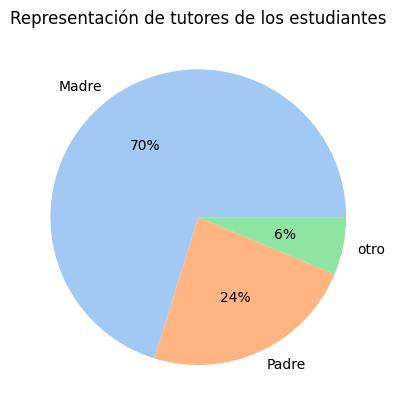

In [24]:
guardian_counts = list(dfav["guardian"].value_counts())

colors = sns.color_palette('pastel')
plt.title("Representación de tutores de los estudiantes")
label = ['Madre', 'Padre', 'otro']
plt.pie(guardian_counts, labels = label, colors = colors, autopct = '%0.0f%%')
plt.show()

In [25]:
import pandas as pd
import plotly.express as px

# Crear un DataFrame de ejemplo
data = {'guardian': ['madre', 'padre', 'otro'],
        'Cantidad': [457, 153, 41]}

datos = pd.DataFrame(data)

# Crear el gráfico de pastel con Plotly
fig = px.pie(datos, values='Cantidad', names='guardian',
             title="Representación de tutores de los estudiantes",
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Mostrar el gráfico
fig.show()


De los 651 estudiantes el 70% tiene como tutor a la madre, el 24% al padre y solo el 6% alguien diferente a la madre y al padre.

**Apoyo educativo adicional**

In [26]:
proporcion(dfav, 'soporte_edu_extra', 'Apoyo educativo adicional')

-------------------------
Apoyo educativo adicional 

no: 89.4%
si: 10.6%
-------------------------


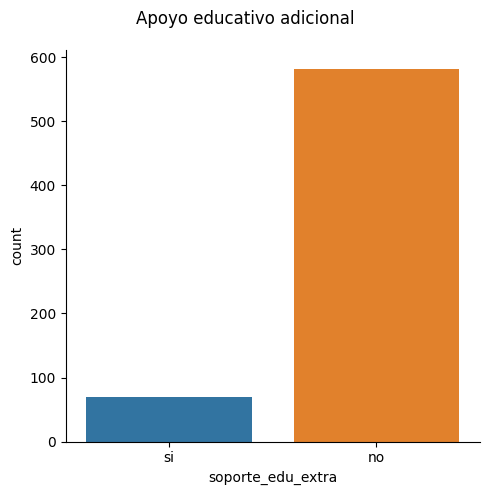

In [27]:
ax = sns.catplot(data = dfav, x = 'soporte_edu_extra', kind = 'count')

ax.fig.subplots_adjust(top = 0.9)
ax.fig.suptitle("Apoyo educativo adicional");

Cerca del 90% de los estudiantes no cuentan con apoyo economico adicional. Esta variable será analizada con más enfasis en las relaciones bivariadas, dado que presenta un gran desbalance lo que podría afectar al modelo de en las predicciones.

**Apoyo educativo familiar**

In [28]:
# crear dataset
base = dfav.groupby(['soporte_edu_fam'])[['nota_03']].count().reset_index().sort_values('nota_03', ascending = False).rename(columns ={'nota_03':'count'})
# crear gráfica
fig = px.pie(base, names='soporte_edu_fam', values='count', title ='<b>Apoyo educativo familiar<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Apoyo educativo familiar',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Se observa que un poco mas de la mitad de los estudiantes cuentan con un apoyo educativo familiar y que esta es una variable con categorias considerablemenete balanceadas

**Monitores**

In [29]:
#crear dataset
base = dfav.groupby(['monitores'])[['nota_03']].count().reset_index().sort_values('nota_03', ascending = False).rename(columns ={'nota_03':'count'})
# crear gráfica
fig = px.bar(base, x='monitores', y='count', title ='<b>Tutores privados (monitores)<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Tiene tutores privados',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Para la variable monitores vemos que esta bastante desbalanceada, podriamos considerar sacarla del modelo para no alterar el algoritmo, indagaremos más a fondo en el análisis bivariado

**Actividades extra-escolares**

In [30]:
# crear dataset
base = dfav.groupby(['actividades_extra'])[['nota_03']].count().reset_index().sort_values('nota_03', ascending = False).rename(columns ={'nota_03':'count'})

# crear gráfica
fig = px.pie(base, names='actividades_extra', values='count', title ='<b>Actividades extra-escolares<b>')

# agregar detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Para la variable actividades extra-escolares vemos que sus categorias estan bastante balanceadas, con una ligera diferencia son mas los estudiantes que no realizan actividades extra-escolares

**Pre-universitario**

In [31]:
# crear dataset
base = dfav.groupby(['preuniversitario'])[['nota_03']].count().reset_index().sort_values('nota_03', ascending = False).rename(columns ={'nota_03':'count'})

# crear gráfica
fig = px.bar(base, x='preuniversitario', y='count', title ='<b> Pre-universitario <b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Realizo pre-universitario',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

La mayoria de los estudiantes realizaron un curso pre-universitario sin embargo una parte relevante no lo realizo, vemos una variable poco desbalanceada, es importante ver su comportamiento vs la variable respuesta

**Post-grado**

In [32]:
# crear dataset
base = dfav.groupby(['postgrado'])[['nota_03']].count().reset_index().sort_values('nota_03', ascending = False).rename(columns ={'nota_03':'count'})

# crear gráfica
fig = px.pie(base, names='postgrado', values='count', title ='<b>Deseo de realizar un post-grado<b>')

# agregar detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Para esta variable vemos que casi un 90% de los datos se concentra en los estudiantes que si desean realizar un post-grado, al estar tan desbalanceada podriamos considerar eliminarla del modelo

**Internet**

In [33]:
# crear dataset
base = dfav.groupby(['internet'])[['nota_03']].count().reset_index().sort_values('nota_03', ascending = False).rename(columns ={'nota_03':'count'})
base['internet'] = base['internet'].replace('yes', 'si')
# crear gráfica
fig = px.bar(base, x='internet', y='count', title ='<b> Acceso a internet en casa <b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Acceso a internet',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

La mayoria de estudiantes tiene acceso a internet en sus hogares, se tiende a ver un poco desbalanceada la variable por ello veremos su comportamiento en el bivariado para tomar una decisión

**Relación romántica**

In [34]:
# crear dataset
base = dfav.groupby(['relacion_sen'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})
base['relacion_sen'] = base['relacion_sen'].replace('yes', 'si')
# crear gráfica
fig = px.pie(base, names='relacion_sen', values='count', title ='<b>Relación romántica<b>')

# agregar detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5)

fig.show()

La mayor parte de los estudiantes no se encuentran en una relación romántica, es una variable que parece estar un poco balanceada

### Variables numéricas

**Edad de los estudiantes**

In [35]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Histogram(x=dfav['edad'], name='Histograma edad', marker_color='coral'),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=dfav['edad'], name='Boxplot de la edad', marker_color='coral'),
    row=1, col=2
)

fig.update_layout(
    title_text="Distribución de la edad de los estudiantes álgebra",
    template='simple_white')
fig.show()

En el histograma que podemos ver a la izquierda, podemos notar que la muestra se comporta de forma más o menos normal, con una cola hacia la derecha, y apoyándonos en el boxplot, podemos ver que el 50% de los datos (entre los q1 y q3), están entre 16 y 18 con una media de 17, con unos bigotes no muy alargados y solo 1 dato atípico, ya que solo 1 estudiante tiene 22 años

**Tiempo en que demoró en realizar el primer examen**

In [36]:
proporcion(dfav,'t_examen', 'Tiempo de primer examen')

-----------------------
Tiempo de primer examen 

1: 56.22%
2: 33.03%
3: 8.29%
4: 2.46%
-----------------------


In [37]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Histogram(x = dfav['t_examen'], name='Histograma tiempo del primer examen', marker_color='LightSkyBlue'),
    row=1, col=1
)

fig.add_trace(
    go.Box(y = dfav['t_examen'], name='Boxplot tiempo del primer examen', marker_color='LightSkyBlue'),
    row=1, col=2
)

fig.update_layout(
    title_text="Distribución tiempo del primer examen",
    template='simple_white')
fig.show()
print('Leyenda: ')
print(' 1:  menos de 15 min    2: 15 a 30 min    3: 30 min a 1 hora    4: mas de 1 hora')

Leyenda: 
 1:  menos de 15 min    2: 15 a 30 min    3: 30 min a 1 hora    4: mas de 1 hora


Alrededor de 581 estudiantes (el 89.25% del total) realizaron el primer examen de álgebra lineal en menos de 30 minutos. Tan solo 16 estudiantes se toman más de una hora para realizar el examen. Esto puede ser un indicio del rendimiento en las notas alcanzadas en el primer examen. En el boxplot la media, el minimo y el primer cuantil tienen el mismo valor esto se debe a que más del cincuenta porciento de los daatos se encuentran en una sola categoría (1), es decir que menos del 50% de los estudiantes solo les toma 15 minutos realizar el examen.

**Tiempo de estudio semanal**

In [38]:
proporcion(dfav,'t_estudio', 'Tiempo de estudio semanal')

-------------------------
Tiempo de estudio semanal 

2: 47.16%
1: 32.57%
3: 14.9%
4: 5.38%
-------------------------


In [39]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Histogram(x = dfav['t_estudio'], name='Histograma tiempo de estudio semanal', marker_color='MediumPurple'),
    row=1, col=1
)

fig.add_trace(
    go.Box(y = dfav['t_estudio'], name='Boxplot tiempo de estudio semanal', marker_color='MediumPurple'),
    row=1, col=2
)

fig.update_layout(
    title_text="Distribución tiempo de estudio de álgebra semanal",
    template='simple_white')
fig.show()
print('Leyenda: ')
print('1: menos de 2 horas    2: 2 a 5 horas    3: 5 a 10 horas    4: mas de 10 horas')

Leyenda: 
1: menos de 2 horas    2: 2 a 5 horas    3: 5 a 10 horas    4: mas de 10 horas


A pesar la poca proporción de estudiantes que duran más de 1 hora haciendo el primer examen de álgebra, casi la mitad de los estudiantes le dedican de 2 a 5 horas de estudio a la semana. En el box plot, la media y el cuantil 3 toman el mismo valor, esto nos dice que tan solo el 25% de los estudiantes estudian 5 horas o más a la semana. El bigote inferior del boxplot está traslapado con el cuantil 1 dado el 33% de los datos corresponen al valor mínimo que es uno.

**Número de faltas a la clase**

In [40]:
proporcion(dfav, 'faltas', 'Número de faltas a clase')

------------------------
Número de faltas a clase 

0: 84.64%
1: 10.75%
2: 2.46%
3: 2.15%
------------------------


In [41]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Histogram(x = dfav['faltas'], name='Histograma faltas a clases', marker_color='lightseagreen'),
    row=1, col=1
)

fig.update_layout(
    title_text="Distribución faltas a clase de álgebra",
    template='simple_white')
fig.show()

Cerca del 85% de los estudiantes no presentan ausencia en las clases de álgebra y trigonometría. Solo el 15% falta ya sea 1, 2 o 3 veces a clases. **Esta variable se tendrá en cuenta al momento de entrenar el modelo**. Dado el desbalance que existe entre las cantidades de faltas a clases.

**Calidad de las relaciones familiares**

In [42]:
# crear dataset
base = dfav.groupby(['relacion_fam'])[['nota_03']].count().reset_index().sort_values('nota_03', ascending = False).rename(columns ={'nota_03':'count'})
#Asignamos etiquetas más faciles de comprender para la variable
base['relacion_fam']=base['relacion_fam'].replace(1,'Muy mala')
base['relacion_fam']=base['relacion_fam'].replace(2,'Regular')
base['relacion_fam']=base['relacion_fam'].replace(3,'Buena')
base['relacion_fam']=base['relacion_fam'].replace(4,'Muy buena')
base['relacion_fam']=base['relacion_fam'].replace(5,'Excelente')
# crear gráfica
fig = px.bar(base, x='relacion_fam', y='count', title ='<b> Calidad de las relaciones familiares <b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Calidad',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Vemos una buena distribucion de los datos y podremos más adelante ver si realmente ayudan a explicar la variable respuesta

**Tiempo libre después de la universidad**

In [43]:
# crear dataset
base = dfav.groupby(['tiempo_libre'])[['nota_03']].count().reset_index().sort_values('nota_03', ascending = False).rename(columns ={'nota_03':'count'})
#Asignamos etiquetas más faciles de comprender para la variable
base['tiempo_libre']=base['tiempo_libre'].replace(1,'Muy bajo')
base['tiempo_libre']=base['tiempo_libre'].replace(2,'Bajo')
base['tiempo_libre']=base['tiempo_libre'].replace(3,'Medio')
base['tiempo_libre']=base['tiempo_libre'].replace(4,'Alto')
base['tiempo_libre']=base['tiempo_libre'].replace(5,'Muy alto')
# crear gráfica
fig = px.bar(base, x='tiempo_libre', y='count', title ='<b> Tiempo libre después de la universidad <b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Tiempo',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Vemos nuevamente una buena distribucion y esta vez con valores mas significativos para las ultimas categorias

**Salir con amigos**

In [44]:
base = dfav.groupby(['salir_amigos'])[['departamento']].count().reset_index().sort_values('departamento', ascending = False).rename(columns ={'departamento':'count'})

# crear gráfica
fig = px.bar(base, x='salir_amigos', y='count', barmode ='group', title ='<b> Nivel de salidas con amigos<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Cantidad',
    yaxis_title = 'Puesto de trabajo',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Observamos que la gran mayoría de los estudiantes tienden a ser moderados en cuanto a las salidas con sus amigos, considerando moderado el nivel 3.

**Consumo de alcohol entre semana**

In [45]:
base = dfav.groupby(['cons_alcohol_sem'])[['departamento']].count().reset_index().sort_values('departamento', ascending=False).rename(columns={'departamento': 'conteo'})

fig = px.bar(base, x='cons_alcohol_sem', y='conteo', barmode='group', title='<b>Consumo de alcohol entre semana<b>')

fig.update_layout(
    xaxis_title='Cantidad',
    yaxis_title='Nivel de consumo de alcohol en jornada laboral',
    template='simple_white',
    title_x=0.5
)

fig.show()

**Consumo de alcohol fines de semana**

In [46]:
base = dfav.groupby(['cons_alcohol_finde'])[['departamento']].count().reset_index().sort_values('departamento', ascending=False).rename(columns={'departamento': 'conteo'})

fig = px.bar(base, x='cons_alcohol_finde', y='conteo', barmode='group', title='<b>Consumo de alcohol fines de semana<b>')

fig.update_layout(
    xaxis_title='Cantidad',
    yaxis_title='Nivel de consumo de alcohol durante el fin de semana',
    template='simple_white',
    title_x=0.5
)

fig.show()

En relación a los hábitos de consumo de alcohol por parte del estudiantado, notamos que en su gran mayoría consumen poco alcohol tanto en semana como fines semana, aunque se nota un ligero aumento de estudiantes que consumen alcohol los fines de semana.

**Salud**

In [47]:
base = dfav.groupby(['salud'])[['departamento']].count().reset_index().sort_values('departamento',ascending=False).rename(columns={'departamento':'conteo'})
fig = px.pie(base, names='salud', values='conteo', title ='<b>Estado de salud de los estudiantes <b>')
fig.update_layout(
    xaxis_title = 'Estado de salud',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Se observa que el estado de salud de los estudiantes es en su gran mayoría bueno.

**Ausencias**

In [48]:
base = dfav.groupby(['ausencias'])[['departamento']].count().reset_index().sort_values('departamento',ascending=False).rename(columns={'departamento':'conteo'})
fig = px.bar(base, x='ausencias', y='conteo', barmode ='group', title ='<b>Número de ausencias<b>')
fig.update_layout(
    xaxis_title = 'Cantidad',
    yaxis_title = 'Número de ausencias',
    template = 'simple_white',
    title_x = 0.5)

In [49]:
dfav['ausencias'].mean()

3.654377880184332

Observamos que el número de ausencias a la universidad es relativamente bajo, 251 estudiantes nunca ha tenido una ausencia a la universidad, y tenemos un promedio aproximado de cuatro ausencias. Es preciso contrastar esta variable con la variable "faltas" en la etapa de análisis multivariado

**Nota 1**

In [50]:
base = dfav['nota_01']
fig = px.histogram(base,marginal='box')

fig.update_xaxes(title_text='Nota obtenida')


fig.show()

El rango intercuartílico para el primer parcial está entre una nota de 10 y 13, lo cual indica que el 50% de los estudiantes de la muestra obtienen notas de 10,11,12 y 13 en el primer examen.

**Nota 2**

In [51]:
base = dfav['nota_02']
fig = px.histogram(base,marginal='box')

fig.update_xaxes(title_text='Nota obtenida')
fig.update_traces(marker_color='green')
fig.show()

Para el segundo parcial, se observa que cerca del 25% de los estudiantes lo ganan (para ganar el examen se requiere un 12 o más), y dado que el tercer cuartil tiene una nota de 13, podemos concluir que un poco más del 25% ganan este examen.

**Nota 3 - variable objetivo**

In [52]:
base = dfav['nota_03']
fig = px.histogram(base,marginal='box')

fig.update_xaxes(title_text='Nota obtenida')
fig.update_traces(marker_color='purple')

fig.show()

Finalmente, el 50% de los estudiantes de la muestra obtienen una nota de entre 10 y 14 para el tercer parcial.

In [53]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [54]:
notas_outlier_index = find_outliers_IQR(dfav['nota_03']).index.tolist()
notas_outlier_values = find_outliers_IQR(dfav['nota_03']).values.tolist()
print('Posición:', notas_outlier_index)
print('Posición:',notas_outlier_values)
print('Número de atipicos en el salario en dolares: ', len(notas_outlier_index))

Posición: [163, 172, 440, 519, 563, 567, 583, 586, 597, 603, 605, 610, 626, 637, 639, 640]
Posición: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Número de atipicos en el salario en dolares:  16


Es preciso resaltar que aunque existen 16 valores atípicos en la variable objetivo, debemos tener en cuenta que estos valores pueden ser debidos a dos causas:

- Error en la toma o en el ingreso de los datos
- Valores que se pueden dar dada la naturalidad de los datos

Teniendo en cuenta que estamos ante un contexto académico, es claro que es muy posible que hayan estudiantes que hayan obtenido una nota de 0 ó 1 en sus resultados. Si decidiéramos eliminar estos datos, estaríamos perdiendo informacion con respecto a la naturalidad de los datos y sesgando la muestra a notas mucho mayores de las que es probable que se obtengan en la realidad. Por esta razón, dejaremos estos valores atípicos incluidos en nuestro dataset.

## Análisis bivariado

### Variables categóricas

**Nivel de educacion de la madre vs nota_03**

In [55]:
# crear dataset
basebipadre = dfav.groupby(['madre_edu'])[['nota_03']].median().reset_index().sort_values('nota_03', ascending = True)

# crear gráfica
fig = px.bar(basebipadre, x='madre_edu', y='nota_03', barmode ='group', title ='<b>Nota promedio del estudiante segun nivel educacion de la madre<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'nivel de educacion madre',
    yaxis_title = 'notas',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Podemos notar en el anterior grafico de líneas que de forma general cuando la educacion de la madre aumenta, las notas del estudiante en promedio también lo hacen.

**Nivel de educacion del padre vs nota_03**

In [56]:
# crear dataset
basebipadre = dfav.groupby(['padre_edu'])[['nota_03']].median().reset_index().sort_values('nota_03', ascending = True)

# crear gráfica
fig = px.bar(basebipadre, x='padre_edu', y='nota_03', barmode ='group', title ='<b>Nota promedio del estudiante segun nivel educacion del padre<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'nivel de educacion padre',
    yaxis_title = 'notas',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Podemos notar en el anterior grafico de líneas que de forma general cuando la educacion del padre aumenta, las notas del estudiante en promedio también lo hacen, debido a que esta variable y la educacion de la madre se comportan de manera muy similar por ello se decide realizar la nueva variable mencionada anteriormente: padres_edu y asi esperamos que el modelo pueda mejorar su desempeño.

**Nivel promedio de educación de los padres vs nota_03**

In [57]:
fig = px.box(dfav,
             x='padres_edu',
             y='nota_03',
             color='padres_edu')

fig.update_layout(
    title_text='Distribucion de las notas de los estudiantes segun la educacion promedio de sus padres',
    xaxis=dict(
        title='educacion promedio padres',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Nota estudiantes',
        titlefont_size=16
    ),
    template='simple_white'
)
fig.show()

Como podemos notar en el boxplot y con un comportamiento muy parecido a las variables madre_edu y padre_edu, a medida que la educacion promedio de los padres aumenta, el promedio de la nota de los estudiantes también lo hace.

**Departamento que cursa el estudiante vs nota_03**

In [58]:
fig = make_subplots(rows=1, cols=2)

nota_by_type = dfav.groupby('departamento')['nota_03'].mean()
nota_by_II = dfav.loc[dfav['departamento']=='II']
nota_by_MS = dfav.loc[dfav['departamento']=='MS']

colors=['orangered', 'green']

fig.add_trace(
    go.Bar(
        x=['Ingenieria industrial', 'Ingenieria de sistemas'],
        y=nota_by_type.values,
        name='Bar Chart',
        text=np.round(nota_by_type.values),
        marker_color=colors),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=nota_by_II['nota_03'], name='Ingenieria industrial'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=nota_by_MS['nota_03'], name='Ingenieria de sistemas'),
    row=1, col=2
)

fig.update_layout(
    title_text="nota promedio segun carrera del estudiante",
    template='simple_white')
fig.show()

Como podemos notar en este análisis bivario, los estudiantes de ingeniería industrial en promedio sacan una nota de aproximadamente 13, es decir, ganan algebra lineal, mientras que los estudiantes de ingeniería de sistemas sacan en promedio una nota de 11, por lo que en promedio pierden la materia.

**Género del estudiante vs nota**

In [59]:
fig = make_subplots(rows=1, cols=2)

nota_by_type = dfav.groupby('sexo')['nota_03'].mean()
nota_by_H = dfav.loc[dfav['sexo']=='H']
nota_by_M = dfav.loc[dfav['sexo']=='M']

colors=['purple', 'orange']

fig.add_trace(
    go.Bar(
        x=['Hombres', 'Mujeres'],
        y=nota_by_type.values,
        name='Bar Chart',
        text=np.round(nota_by_type.values),
        marker_color=colors),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=nota_by_H['nota_03'], name='Hombres'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=nota_by_M['nota_03'], name='Mujeres'),
    row=1, col=2
)

fig.update_layout(
    title_text="nota promedio segun genero del estudiante",
    template='simple_white')
fig.show()

Como podemos ver en los gráficos anteriores, la nota promedio de los hombres es de 11, mientras que la de las mujeres es de 12, aun no es un cambio muy gran debemos tener en cuenta que con una nota de 11 se perdería la materia y con una de 12 se ganaría, por lo que se decide dejar la variable para el modelo de predicción.

**Nota del estudiante vs dirección**

In [60]:
fig = make_subplots(rows=1, cols=2)

nota_by_type = dfav.groupby('direccion')['nota_03'].mean()
nota_by_R = dfav.loc[dfav['direccion']=='R']
nota_by_U = dfav.loc[dfav['direccion']=='U']

colors=['red', 'blue']

fig.add_trace(
    go.Bar(
        x=['Rural', 'Urbana'],
        y=nota_by_type.values,
        name='Bar Chart',
        text=np.round(nota_by_type.values),
        marker_color=colors),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=nota_by_R['nota_03'], name='Rural'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=nota_by_U['nota_03'], name='Urbana'),
    row=1, col=2
)

fig.update_layout(
    title_text="nota promedio segun direccion del estudiante",
    template='simple_white')
fig.show()

Teniendo en cuenta que, en las gráficas anteriores, los estudiantes de zona rural en promedio pierden con una nota de 11 y los estudiantes de zona urbana en promedio ganan con una nota de 12, se decide dejar la variable para el modelo de predicción.

**Tamaño de la familia vs nota_03 estudiante**

In [61]:
# crear dataset
basebitfamilia = dfav.groupby(['t_familia'])[['nota_03']].mean().reset_index()

# crear gráfica
fig = px.bar(basebitfamilia, x='t_familia', y='nota_03', barmode ='group', title ='<b>Nota final de los estudiantes segun tamaño de su familia<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Tamaño familia',
    yaxis_title = 'nota promedio segun tamaño familia',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Debido a que no se ve una gran variación entre la nota promedio de las familias mayores a 3 y las menores a 3, se decide que esta variable no se tendrá en cuenta en el modelo final.

**nota_03 vs status_padres**

In [62]:
fig = make_subplots(rows=1, cols=2)

nota_by_type = dfav.groupby('padres_status')['nota_03'].mean()
nota_by_J = dfav.loc[dfav['padres_status']=='J']
nota_by_S = dfav.loc[dfav['padres_status']=='S']

colors=['green', 'orange']

fig.add_trace(
    go.Bar(
        x=['Juntos', 'Separados'],
        y=nota_by_type.values,
        name='Bar Chart',
        text=np.round(nota_by_type.values),
        marker_color=colors),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=nota_by_J['nota_03'], name='Juntos'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=nota_by_S['nota_03'], name='Separados'),
    row=1, col=2
)

fig.update_layout(
    title_text="nota promedio segun status de los padres del estudiante",
    template='simple_white')
fig.show()

Debido a que no se ve una gran variación entre el estatus de los padres, que estén separados o juntos, de concluye que esto no tendrá un peso considerable en el modelo.

**Trabajo de la madre vs Nota 3**

In [63]:
fig = make_subplots(rows=1, cols=2)

nota_by_type = dfav.groupby('madre_trab')['nota_03'].mean()
nota_by_en_casa = dfav.loc[dfav['madre_trab']=='en_casa']
nota_by_salud = dfav.loc[dfav['madre_trab']=='salud']
nota_by_otro = dfav.loc[dfav['madre_trab']=='otro']
nota_by_servicios = dfav.loc[dfav['madre_trab']=='servicios']
nota_by_profesor = dfav.loc[dfav['madre_trab']=='profesor']

colors = ['orangered', 'green', 'purple', 'orange','turquoise']

fig.add_trace(
    go.Bar(
        x = ['En casa', 'Salud', 'Otro', 'Servicios', 'Profesor'],
        y = nota_by_type.values,
        name = 'Bar Chart',
        text = np.round(nota_by_type.values),
        marker_color = colors),
    row = 1, col = 1
)

fig.add_trace(
    go.Box(y = nota_by_en_casa['nota_03'], name = 'en_casa'),
    row = 1, col = 2
)

fig.add_trace(
    go.Box(y = nota_by_salud['nota_03'], name = 'salud'),
    row = 1, col = 2
)

fig.add_trace(
    go.Box(y = nota_by_otro['nota_03'], name = 'otro'),
    row = 1, col = 2
)

fig.add_trace(
    go.Box(y = nota_by_servicios['nota_03'], name = 'servicios'),
    row = 1, col = 2
)

fig.add_trace(
    go.Box(y = nota_by_profesor['nota_03'], name = 'profesor'),
    row = 1, col = 2
)

fig.update_layout(
    title_text = "Promedio nota 3 según el tipo de empleo de la madre",
    template = 'simple_white')
fig.show()


No se percibe una gran diferencia entre las notas de los estudiantes y las ocupaciones de sus madres, sin embargo, los hijos de las madres que ocupan los puestos de salud son los únicos que no han tenido nota de cero ni por debajo de 8 y los hijos de las madres que tienen cargos en casa suelen tener un rango de notas menor a los demás. Esta variable será incluida en el modelo, dado las pequeñas variaciones entre los promedios de las notas según el cargo de las madres de los estudiantes.

**Trabajo del padre vs Nota 3**

In [64]:
fig = make_subplots(rows = 1, cols = 2)

nota_by_type = dfav.groupby('padre_trab')['nota_03'].mean()
nota_by_en_casa = dfav.loc[dfav['padre_trab']=='en_casa']
nota_by_salud = dfav.loc[dfav['padre_trab']=='salud']
nota_by_otro = dfav.loc[dfav['padre_trab']=='otro']
nota_by_servicios = dfav.loc[dfav['padre_trab']=='servicios']
nota_by_profesor = dfav.loc[dfav['padre_trab']=='profesor']

colors = ['orangered', 'green', 'purple', 'orange','turquoise']

fig.add_trace(
    go.Bar(
        x = ['En casa', 'Salud', 'Otro', 'Servicios', 'Profesor'],
        y = nota_by_type.values,
        name = 'Bar Chart',
        text = np.round(nota_by_type.values),
        marker_color = colors),
    row = 1, col = 1
)

fig.add_trace(
    go.Box(y = nota_by_en_casa['nota_03'], name = 'en_casa'),
    row = 1, col = 2
)

fig.add_trace(
    go.Box(y = nota_by_salud['nota_03'], name = 'salud'),
    row = 1, col = 2
)

fig.add_trace(
    go.Box(y = nota_by_otro['nota_03'], name = 'otro'),
    row = 1, col = 2
)

fig.add_trace(
    go.Box(y = nota_by_servicios['nota_03'], name = 'servicios'),
    row = 1, col = 2
)

fig.add_trace(
    go.Box(y = nota_by_profesor['nota_03'], name = 'profesor'),
    row = 1, col = 2
)

fig.update_layout(
    title_text = "Promedio nota 3 según el tipo de empleo del padre",
    template = 'simple_white')
fig.show()


Similar al comportamiento de los hijos de las madres, para los hijos de los padres con cargos en salud ninguno a obtenido nota de cero ni por debajo de 6. Dada las variaciones en las medias de las notas en cada cargo y las diferencias entre los rangos de nota obtenidos por los estudaintes según el cargo de su padre, esta variable será incluida en el la elaboración del modelo.

**Razón para elegir la carrera vs Nota 3**

In [65]:
# crear dataset
base = dfav.groupby(['razon'])[['nota_03']].median().reset_index().sort_values('nota_03', ascending = True)

# crear gráfica
fig = px.bar(base, x='razon', y='nota_03', barmode ='group', title ='<b>Nota 3 del examen según la razón de selección de la carrera<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Razón',
    yaxis_title = 'Nota promedio examen 3',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Las razones por las cuales los estudiantes seleccionaron la carrera parece no ser un factor tan diferenciador en la nota 3 de los estudiantes, sin embargo, los valores de las medias rondan de 11 hasta 13 lo que da a entender que en promedio la razón está determinando a los que cuentan con habilidad pierden los parciales al igual que los que tiene alguna otra razón, pero los que están por recomendación y reputación suelen ganar el examen de manera oportuna. Dada esta apreciación, esta variable se tendrá en cuenta en la elaboración del modelo.

**Tutor del estudiante vs Nota 3**

In [66]:
fig = px.box(dfav,
             x='guardian',
             y='nota_03',
             color='guardian')

fig.update_layout(
    title_text='Distribución de la nota 3 según el tutor del estudiante',
    xaxis=dict(
        title='Tutor',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Promedio nota 3',
        titlefont_size=16
    ),
    template='simple_white'
)
fig.show()

Al analizar los boxplot de izquierda a derecha, los bigotes se van acortando al igual que la media de la nota 3 va disminuyendo. Este comportamiento refleja una relación entre el puntaje de nota y el tipo de tutor que está encargado del estudiante. De manera emocional puede que el apoyo de las madres ayude a los estudiantes a obtener mejores calificaciones. Esta variable se incluirá en el modelo final.

**Apoyo educativo adicional vs Nota 3**

In [67]:
fig = make_subplots(rows=1, cols=2)

nota_by_apoyo = dfav.groupby('soporte_edu_extra')['nota_03'].mean().sort_values(ascending=True)
nota_by_si = dfav.loc[dfav['soporte_edu_extra']== 'si']
nota_by_no = dfav.loc[dfav['soporte_edu_extra']== 'no']


colors=['salmon', 'maroon']

fig.add_trace(
    go.Bar(
        x = ['si', 'no'],
        y = nota_by_apoyo.values,
        name = 'Bar Chart',
        marker_color = colors,
        text = np.round(nota_by_apoyo.values)),
    row = 1, col = 1
)

fig.add_trace(
    go.Box(y = nota_by_si['nota_03'], name = 'Si', marker_color = 'salmon'),
    row = 1, col = 2
)

fig.add_trace(
    go.Box(y = nota_by_no['nota_03'], name = 'No', marker_color = 'maroon'),
    row = 1, col = 2
)

fig.update_layout(title_text="Nota promedio según el apoyo educativo adicional", template='simple_white')
fig.show()

  En el diagrama de cajas y bigotes el comportamiento de las notas de los estudiantes que no cuentan con apoyo económico adicional es más variado y el valor mínimo es más bajo que los estudiantes que sí cuentan con apoyo económico adicional. Aunque a los estudiantes que no tiene apoyo en promedio suelen tener mejor notas. A pesar de este comportamiento, esta variable no se tendrá en cuenta dado en gran desbalance de las muestras, ya que el 90% de los datos se concentran en una sola categoría.

**Nota 3 vs apoyo educativo familiar**

In [68]:
fig = make_subplots(rows=1, cols=2)

nota_by_apoyo = dfav.groupby('soporte_edu_fam')['nota_03'].mean().sort_values(ascending=True)
nota_by_si = dfav.loc[dfav['soporte_edu_fam']== 'si']
nota_by_no = dfav.loc[dfav['soporte_edu_fam']== 'no']


colors=['salmon', 'maroon']

fig.add_trace(
    go.Bar(
        x = ['si', 'no'],
        y = nota_by_apoyo.values,
        name = 'Bar Chart',
        marker_color = colors,
        text = np.round(nota_by_apoyo.values)),
    row = 1, col = 1
)

fig.add_trace(
    go.Box(y = nota_by_si['nota_03'], name = 'Si', marker_color = 'salmon'),
    row = 1, col = 2
)

fig.add_trace(
    go.Box(y = nota_by_no['nota_03'], name = 'No', marker_color = 'maroon'),
    row = 1, col = 2
)

fig.update_layout(title_text="Nota promedio según el apoyo educativo familiar", template='simple_white')
fig.show()

Vemos que si hay apoyo educativo familiar o no lo hay, la variable respuesta tiende a moverse entre valores muy similares, podemos decir que el apoyo educativo es una variable que no ayuda a explicar la variable objetivo. Ademas vemos que hay pocos datos atipicos en ambas categorias. Por esta variable no la consideraremos en el modelo

**Nota 3 vs Monitores**

In [69]:
fig = make_subplots(rows=1, cols=2)

nota_by_m = dfav.groupby('monitores')['nota_03'].mean().sort_values(ascending=True)
nota_by_si = dfav.loc[dfav['monitores']== 'si']
nota_by_no = dfav.loc[dfav['monitores']== 'no']


colors=['blue', 'yellow']

fig.add_trace(
    go.Bar(
        x = ['si', 'no'],
        y = nota_by_m.values,
        name = 'Bar Chart',
        marker_color = colors,
        text = np.round(nota_by_m.values)),
    row = 1, col = 1
)

fig.add_trace(
    go.Box(y = nota_by_si['nota_03'], name = 'Si', marker_color = 'blue'),
    row = 1, col = 2
)

fig.add_trace(
    go.Box(y = nota_by_no['nota_03'], name = 'No', marker_color = 'yellow'),
    row = 1, col = 2
)

fig.update_layout(title_text="Nota promedio según si tiene clases extra con tutores privados", template='simple_white')
fig.show()

Anteriormente vimos que monitores es una variable bastante desbalanceada y esto puede llegar a afectar el algoritmo, por otro lado el rango intercuartilico nos muestra solo ligeros cambios de una categoria a otra. Al ser una variable tan desbalanceada no la vamos a ingresar al mismo

**Nota 3 vs Actividades extra-escolares**

In [70]:
fig = make_subplots(rows=1, cols=2)

nota_by_aee = dfav.groupby('actividades_extra')['nota_03'].mean().sort_values(ascending=True)
nota_by_si = dfav.loc[dfav['actividades_extra']== 'si']
nota_by_no = dfav.loc[dfav['actividades_extra']== 'no']


colors=['grey', 'purple']

fig.add_trace(
    go.Bar(
        x = ['si', 'no'],
        y = nota_by_aee.values,
        name = 'Bar Chart',
        marker_color = colors,
        text = np.round(nota_by_aee.values)),
    row = 1, col = 1
)

fig.add_trace(
    go.Box(y = nota_by_si['nota_03'], name = 'Si', marker_color = 'grey'),
    row = 1, col = 2
)

fig.add_trace(
    go.Box(y = nota_by_no['nota_03'], name = 'No', marker_color = 'purple'),
    row = 1, col = 2
)

fig.update_layout(title_text="Nota promedio según si realiza actividades extra-escolares", template='simple_white')
fig.show()

Anteriormente vimos que esta es una variable bastante balanceada en sus categorias, a pesar de no ver muchas diferencias en el boxplot podremos dejarla en una primera instancia en el modelo ya que al no tener actividades extra-escolares vemos como la mediana tiende a 11 (perder la nota 3) y a 12 cuando si se realizan actividades extra-escolares

**Nota 3 vs Pre-universitario**

In [71]:
fig = make_subplots(rows=1, cols=2)

nota_by_pre = dfav.groupby('preuniversitario')['nota_03'].mean().sort_values(ascending=True)
nota_by_si = dfav.loc[dfav['preuniversitario']== 'si']
nota_by_no = dfav.loc[dfav['preuniversitario']== 'no']


colors=['green', 'pink']

fig.add_trace(
    go.Bar(
        x = ['si', 'no'],
        y = nota_by_pre.values,
        name = 'Bar Chart',
        marker_color = colors,
        text = np.round(nota_by_pre.values)),
    row = 1, col = 1
)

fig.add_trace(
    go.Box(y = nota_by_si['nota_03'], name = 'Si', marker_color = 'green'),
    row = 1, col = 2
)

fig.add_trace(
    go.Box(y = nota_by_no['nota_03'], name = 'No', marker_color = 'pink'),
    row = 1, col = 2
)

fig.update_layout(title_text="Nota promedio según si realizo un pre-universitario", template='simple_white')
fig.show()

Vemos que se presentan ligeras diferencias entre los estudiantes que realizaron o no un pre-universitario, sin embargo anteriormente vimos que esta variable esta mayormente desbalanceada por ello no la incluiremos inicialmente en el modelo

**Nota 3 vs Post-grado**

In [72]:
fig = make_subplots(rows=1, cols=2)

nota_by_post = dfav.groupby('postgrado')['nota_03'].mean().sort_values(ascending=True)
nota_by_si = dfav.loc[dfav['postgrado']== 'si']
nota_by_no = dfav.loc[dfav['postgrado']== 'no']


colors=['orange', 'red']

fig.add_trace(
    go.Bar(
        x = ['si', 'no'],
        y = nota_by_post.values,
        name = 'Bar Chart',
        marker_color = colors,
        text = np.round(nota_by_post.values)),
    row = 1, col = 1
)

fig.add_trace(
    go.Box(y = nota_by_si['nota_03'], name = 'Si', marker_color = 'orange'),
    row = 1, col = 2
)

fig.add_trace(
    go.Box(y = nota_by_no['nota_03'], name = 'No', marker_color = 'red'),
    row = 1, col = 2
)

fig.update_layout(title_text="Nota promedio según si desea realizar un post-grado", template='simple_white')
fig.show()

Se logra apreciar una gran diferencia entre las categorias de estudiantes que desean realizar un post-grado y sus notas, sin embargo, debemos recordar que esta variable tiene sus categorias bastante desbalanceadas por lo tanto no ayudara al modelo a predecir correctamente, no se incluirá

**Nota 3 vs internet**

In [73]:
dfav['internet'] = dfav['internet'].replace('yes', 'si')
fig = px.box(dfav,
             x='internet',
             y='nota_03',
             color='internet')

fig.update_layout(
    title_text='Distribución de la nota 3 según si tiene internet en el hogar',
    xaxis=dict(
        title='internet',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Nota 3',
        titlefont_size=16
    ),
    template='simple_white'
)
fig.show()

El tener o no internet en el hogar vemos que tiene cierta incidencia en la variable respuesta, cuando el alumno si tiene internet en el hogar se ve que obtiene mejores notas, cuando no tiene este servicio vemos que las notas bajan un poco y las unicas altas son algunos atipicos que son pocos en este caso, esta variable la incluiremos al modelo ya que vemos que puede ayudarnos a predecir la variable objetivo

**Nota 3 vs relación romántica**

In [74]:
dfav['relacion_sen'] = dfav['relacion_sen'].replace('yes', 'si')
fig = px.box(dfav,
             x='relacion_sen',
             y='nota_03',
             color='relacion_sen')

fig.update_layout(
    title_text='Distribución de la nota 3 según si tiene una relación romántica',
    xaxis=dict(
        title='relación romántica',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Nota 3',
        titlefont_size=16
    ),
    template='simple_white'
)
fig.show()

Vemos que la mediana se mantiene para ambas categorias y los cambios son muy ligeros por ello no incluiremos la variable en el modelo ya que parecer no tener mucha incidencia en la explicacion de la variable objetivo

### Variables numéricas

**nota_03 vs edad estudiante**

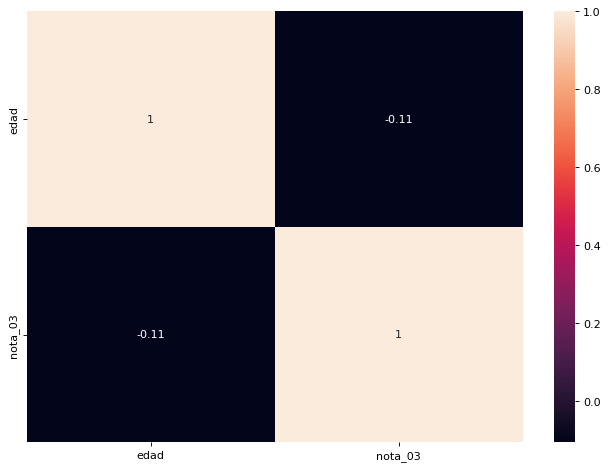

In [75]:
from matplotlib.pyplot import figure
dfaux = dfav[['edad', 'nota_03']]
figure(figsize=(10, 7), dpi=80);
sns.heatmap(dfaux.corr(), annot = True);

In [76]:
fig = px.box(dfav,
             x='edad',
             y='nota_03',
             color='edad')

fig.update_layout(
    title_text='Distribucion de las notas de los estudiantes segun su edad',
    xaxis=dict(
        title='edad estudiantes',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Nota estudiantes',
        titlefont_size=16
    ),
    template='simple_white'
)
fig.show()

In [77]:
# crear base
base = dfav.groupby(['edad'])[['nota_03']].mean().reset_index().sort_values('edad', ascending = False)
# definir gráfica
fig = px.bar(base, x='edad', y='nota_03')

# definir gráfica
fig.update_layout(
    title ='<b>Nota final del estudiantes segun edad<b>',
    xaxis_title = 'Edad estudiante',
    yaxis_title = 'Nota promedio',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Como podemos notar en las gráficas anteriores, no se puede reconocer una correlación clara entre la variable independiente (edad del estudiante) y la variable dependiente (nota del estudiante), debido a que hay una correlación muy baja en el mapa de calor, y en las siguientes 2 variables no se puede apreciar un cambio considerable en el comportamiento a medida que cambia la edad, a excepción de los 22 años, pero debemos tener en cuenta que este dato es atípico ya que solo tenemos 1 estudiante con esa edad. Debido a lo anterior se decidió quitar la variable del modelo.

**Tiempo primer examen vs Nota 3**

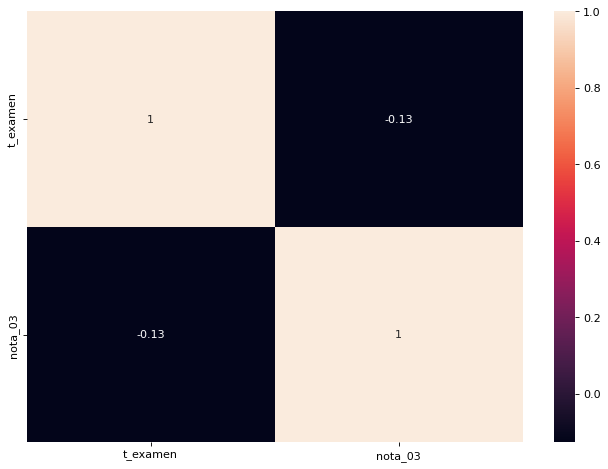

In [78]:
from matplotlib.pyplot import figure
df_aux = dfav[['t_examen', 'nota_03']]
figure(figsize=(10, 7), dpi=80);
sns.heatmap(df_aux.corr(), annot = True);

In [79]:
fig = make_subplots(rows=1, cols=2)

nota_by_time = dfav.groupby('t_examen')['nota_03'].mean().sort_values(ascending=True)
nota_by_1 = dfav.loc[dfav['t_examen']== 1]
nota_by_2 = dfav.loc[dfav['t_examen']== 2]
nota_by_3 = dfav.loc[dfav['t_examen']== 3]
nota_by_4 = dfav.loc[dfav['t_examen']== 4]

colors=['coral', 'orangered', 'salmon', 'maroon']

fig.add_trace(
    go.Bar(
        x = ['1', '2', '3', '4'],
        y = nota_by_time.values,
        name = 'Bar Chart',
        marker_color = colors,
        text = np.round(nota_by_time.values)),
    row = 1, col = 1
)

fig.add_trace(
    go.Box(y = nota_by_1['nota_03'], name = '1', marker_color = 'coral'),
    row = 1, col = 2
)

fig.add_trace(
    go.Box(y = nota_by_2['nota_03'], name = '2', marker_color = 'orangered'),
    row = 1, col = 2
)

fig.add_trace(
    go.Box(y = nota_by_3['nota_03'], name = '3', marker_color = 'salmon'),
    row = 1, col = 2
)

fig.add_trace(
    go.Box(y = nota_by_4['nota_03'], name = '4', marker_color = 'maroon'),
    row = 1, col = 2
)

fig.update_layout(title_text="Nota promedio según el tiempo del primer examen", template='simple_white')
fig.show()

El comportamiento de esta variable respecto a la nota tres es incosistente ya que al mirar el boxplot muestra que entre más bajo sea el tiempo del primer examen, mejor nota tendrá el estudiante lo cual en la práctica no suele ser así. Al mirar el diagrama de correlación entre la nota 3 y el tiempo de primer examen esta relación es poco fuerte pero nos indica que es negativa, por lo que afirma que tienen una relació inversa. Estas razones nos llevan a creer que esta variable no explicaría de manera coherente los resultados de las califiaciones, por lo que no se tendrá en cuenta para el modelo.

**Tiempo de estudio semanal vs Nota 3**

In [80]:
fig = px.box(dfav,
             x='t_estudio',
             y='nota_03',
             color='t_estudio')

fig.update_layout(
    title_text='Distribución de la nota 3 según el tiempo de estudio semanal',
    xaxis=dict(
        title='Tiempo',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean nota 3',
        titlefont_size=16
    ),
    template='simple_white'
)
fig.show()

A medida que se va teniendo mayor tiempo de estudio entre semana el rango intercuartilico va adaptando una proporción a mejores notas, así como la media va creciendo. Podemos afirmar que entre más tiempo se dedique al estudio se tendrá una buena nota, sin embargo para las personas que estudian más de 10 horas las notas suelen ser parecidas a las personas que estudian de 5 a 10 horas, por lo que al estudiar por largos periodos de tiempo en la semana no puede asegurar una mejor nota. Esta variable será tenida en cuenta para la elaboración del modelo.

**Número de faltas a clases vs Nota 3**

In [81]:
# crear base
base = dfav.groupby(['faltas'])[['nota_03']].mean().reset_index().sort_values('faltas', ascending = True)

# definir gráfica
fig = px.bar(base, x='faltas', y='nota_03')

# definir gráfica
fig.update_layout(
    title ='<b>Nota 3 promedio por numero de faltas<b>',
    xaxis_title = 'Faltas',
    yaxis_title = 'Nota promedio',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [82]:
fig = px.box(dfav,
             x='faltas',
             y='nota_03',
             color='faltas')

fig.update_layout(
    title_text='Distribución de la nota 3 según las faltas a clases',
    xaxis=dict(
        title='Faltas',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean nota 3',
        titlefont_size=16
    ),
    template='simple_white'
)
fig.show()

Al analizar el diagrama de lineas como el diagrama de cajas y bigotes, el comportamiento de las faltas a clases con la nota 3 es directamente proporcional, a mayor faltas a clases el estudiante obtendrá notas más bajas, aunque no faltar a clases no asegura tener mejores notas ya que en todas las categorías hay estudiantes que tiene notas muy bajas (Atipicos). Esta variable será incluida en el modelo.

**Nota 3 vs calidad relaciones familiares**

In [83]:
fig = px.box(dfav,
             x='relacion_fam',
             y='nota_03',
             color='relacion_fam')

fig.update_layout(
    title_text='Distribución de la nota 3 según la calidad de la relacion familiar',
    xaxis=dict(
        title='Calidad',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Promedio nota 3',
        titlefont_size=16
    ),
    template='simple_white'
)
fig.show()
print("1:Muy mala, 2:Regular, 3:Buena, 4:Muy buena, 5:Excelente")

1:Muy mala, 2:Regular, 3:Buena, 4:Muy buena, 5:Excelente


Logramos ver como la calidad de relaciones familiares puede de cierta forma afectar el rendimiento del estudiante, vemos un comportamiento que tiene mucha lógica ya que entre mejor sea esta relación mayores notas obtienen, al ser una variable balanceada tambien, la incluiremos en el modelo

**Tiempo libre vs Nota 3**

In [84]:
fig = px.box(dfav,
             x='tiempo_libre',
             y='nota_03',
             color='tiempo_libre')

fig.update_layout(
    title_text='Distribución de la nota 3 según el tiempo libre despues de clases',
    xaxis=dict(
        title='Tiempo libre',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Promedio nota 3',
        titlefont_size=16
    ),
    template='simple_white'
)
fig.show()
print("1:Muy bajo, 2:Bajo, 3:Regular, 4:Alto, 5:Muy alto")

1:Muy bajo, 2:Bajo, 3:Regular, 4:Alto, 5:Muy alto


A partir del grafico vemos como tienden a tener mejores notas los estudiantes que no cuentan con mucho tiempo libre, se podria ver como entre mas ocupados se encuentren pare que se dedican mas a estudiar para sus parciales, incluiremos la variable en el modelo

**Salidas con amigos vs Nota 3**

In [85]:
fig = make_subplots(rows=1, cols=2)

nota_amigos = dfav.groupby('salir_amigos')['nota_03'].mean()
salir_1 = dfav.loc[dfav['salir_amigos']== 1]
salir_2 = dfav.loc[dfav['salir_amigos']== 2]
salir_3 = dfav.loc[dfav['salir_amigos']== 3]
salir_4 = dfav.loc[dfav['salir_amigos']== 4]
salir_5 = dfav.loc[dfav['salir_amigos']== 5]

colors=['orangered', 'green', 'purple', 'orange','blue']

fig.add_trace(
    go.Bar(
        x=['1', '2', '3', '4','5'],
        y=nota_amigos.values,
        name='Bar Chart',
        text=np.round(nota_amigos.values),
        marker_color=colors),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=salir_1['nota_03'], name='1'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=salir_2['nota_03'], name='2'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=salir_3['nota_03'], name='3'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=salir_4['nota_03'], name='4'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=salir_5['nota_03'], name='5'),
    row=1, col=2
)

fig.update_layout(
    title_text="Nota promedio según nivel de salidas con amigos",
    template='simple_white')
fig.show()


Según el gráfico  de barras anterior, en promedio la nota del examen 3 de un estudiante que sale mucho con sus amigos (5) es aproximadamente igual a la nota de un estudiante que sale muy poco con sus amigos (1). Adicional a esto, en el gráfico de boxplot observamos que los rangos intercuartílicos para cada nivel de salidas con amigos es muy similar.

Dados los argumentos anteriores, decidimos no incluir la variable `salir_amigos` puesto que parece no tener significacia con respecto a la nota del examen 3.

**Consumo de alcohol entre semana vs Nota 3**

In [86]:
fig = make_subplots(rows=1, cols=2)

nota_alcoholsem = dfav.groupby('cons_alcohol_sem')['nota_03'].mean()
alcoholsem_1 = dfav.loc[dfav['cons_alcohol_sem']== 1]
alcoholsem_2 = dfav.loc[dfav['cons_alcohol_sem']== 2]
alcoholsem_3 = dfav.loc[dfav['cons_alcohol_sem']== 3]
alcoholsem_4 = dfav.loc[dfav['cons_alcohol_sem']== 4]
alcoholsem_5 = dfav.loc[dfav['cons_alcohol_sem']== 5]


colors=['orangered', 'green', 'purple', 'orange','blue']

fig.add_trace(
    go.Bar(
        x=['1', '2', '3', '4','5'],
        y=nota_alcoholsem.values,
        name='Bar Chart',
        text=np.round(nota_alcoholsem.values),
        marker_color=colors),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=alcoholsem_1['nota_03'], name='1'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=alcoholsem_2['nota_03'], name='2'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=alcoholsem_3['nota_03'], name='3'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=alcoholsem_4['nota_03'], name='4'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=alcoholsem_5['nota_03'], name='5'),
    row=1, col=2
)

fig.update_layout(
    title_text="Nota promedio según consumo de alcohol a la semana",
    template='simple_white')
fig.show()


En el gráfico de barras es evidente que la nota promedio de los estudiantes disminuye a medida que aumenta su grado de nivel de alcohol semanal. En el boxplot podemos ver rangos intercuartílicos variables para cada nivel de consumo.

De acuerdo con la intuición podríamos esperar que un joven que consuma mucho alcohol entre semana disminuya su rendimiento académico. Por esta razón, ,incluiremos esta variable en el modelo.

**Consumo de alcohol fines de semana vs Nota 3**

In [87]:
fig = make_subplots(rows=1, cols=2)

nota_alcoholfinde = dfav.groupby('cons_alcohol_finde')['nota_03'].mean()
alcoholsem_1 = dfav.loc[dfav['cons_alcohol_finde']== 1]
alcoholsem_2 = dfav.loc[dfav['cons_alcohol_finde']== 2]
alcoholsem_3 = dfav.loc[dfav['cons_alcohol_finde']== 3]
alcoholsem_4 = dfav.loc[dfav['cons_alcohol_finde']== 4]
alcoholsem_5 = dfav.loc[dfav['cons_alcohol_finde']== 5]


colors=['orangered', 'green', 'purple', 'orange','blue']

fig.add_trace(
    go.Bar(
        x=['1', '2', '3', '4','5'],
        y=nota_alcoholfinde.values,
        name='Bar Chart',
        text=np.round(nota_alcoholfinde.values),
        marker_color=colors),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=alcoholsem_1['nota_03'], name='1'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=alcoholsem_2['nota_03'], name='2'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=alcoholsem_3['nota_03'], name='3'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=alcoholsem_4['nota_03'], name='4'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=alcoholsem_5['nota_03'], name='5'),
    row=1, col=2
)

fig.update_layout(
    title_text="Nota promedio según consumo de alcohol a la semana",
    template='simple_white')
fig.show()

Nótese que también parece haber un impacto negativo en la nota promedio de los estudiantes respecto al consumo los fines de semana. Adicional a esto, en el boxplot se observa que los niveles (1,2,3) tienen una mediana de 12 mientras que los niveles (4,5) una mediana de 11.

Si bien sólo es una unidad de diferencia, es importante resaltar que los estudiantes que sacan un 12 aprueban el examen, y quienes sacan 11 no lo aprueban.

Por esta razón, vamos a considerar esta variables en el modelo. Dado que ambas variables apuntan a los hábitos de consumo de alcohol de los estudiantes, decidimos juntar éstas mediante un promedio.

**Salud vs Nota 3**

In [88]:
# Gráfico de caja
fig2 = px.box(dfav, x='salud', y='nota_03', title='<b>Nota del estudiante según su estado de salud<b>')
fig2.show()

In [89]:
base = dfav.groupby(['salud'])[['nota_03']].mean().reset_index().sort_values('salud', ascending = True)

# crear gráfica
fig = px.bar(base, x='salud', y='nota_03', barmode ='group', title ='<b>Nota promedio según estado de salud<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Estado de salud',
    yaxis_title = 'Nota promedio en el examen 3',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Observemos que si bien las medianas de los diferentes niveles de estado de salud son muy similares en el boxplot y  en el gráfico de barras la nota promedio también lo es, notemos que parece tener una tendencia que nos sugiere que a medida que el estado de salud de un estudiante es mejor (5), en promedio sus notas son peores.

Esto realmente no tiene mucho sentido, por lo cual con consideraremos esta variable en nuestro modelo de regresión lineal.

**Ausencias vs Nota 3**

In [90]:
base = dfav.groupby(['ausencias'])[['nota_03']].mean().reset_index().sort_values('ausencias', ascending=True)
fig = px.scatter(base, x='ausencias', y='nota_03', title='<b>Nota promedio según ausencias a la universidad<b>')

fig.show()

Nótese que en el caso de la variable ausencias, no es muy claro si hay una relación directa con respecto a la nota 3 en promedio. Alguien podría notar una tendencia creciente en el gráfico dado a los datos que se encuentran sobre el valor de 30 ausencias, y suponiendo que esa tendecia existiese, es contraintutivo el pensar que mientras más se ausente un estudiante a la universidad, mayor sería su nota promedio en el examen final.

Por otro lado, recordemos que a mayor número de faltas, el promedio de los estudiantes disminuye. En lugar de incluir la variable `ausencias` en el modelo, vamos a incluir la variable `faltas`.

Es posible que un estudiante se haya ausentado a la universidad un día que no tenía clase de álgebra lineal, en este caso, no tiene mucha relación su ausencia con su desempeño en dicha materia.

**Nota 1 vs Nota 3**

In [91]:
base = dfav.groupby(['nota_01'])[['nota_03']].mean().reset_index().sort_values(['nota_01'],ascending=True)
fig = px.scatter(base, x='nota_01',y='nota_03')
fig.add_trace(go.Scatter(x=base['nota_01'], y=base['nota_03'], mode='markers', name='Nota promedio tercer examen'))
fig.show()

Es evidente que la tendencia de los estudiantes es a aumentar sus notas en el examen 3. No obstante, tenemos un dato en cero que puede llegar a generarnos dudas.

Realicemos una transformación a los datos para ver el comportamiento de las notas obtenidas en el tercer examen basándonos en si el estudiante 'ganó' o 'perdió' el primer examen.

In [92]:
condicion_ganar = base['nota_01'] >= 12
condicion_perder = base['nota_01'] < 12

base['Resultado_Examen1'] = 0
base.loc[condicion_ganar, 'Resultado_Examen1'] = 'Ganó'
base.loc[condicion_perder,'Resultado_Examen1'] = 'Perdió'
display(base)

fig = px.box(base, x='Resultado_Examen1',y='nota_03')
fig.show()


,nota_01,nota_03,Resultado_Examen1
0,0,11.000000,Perdió
1,4,4.000000,Perdió
2,5,2.600000,Perdió
3,6,8.222222,Perdió
4,7,7.090909,Perdió
5,8,8.190476,Perdió
6,9,9.784615,Perdió
7,10,10.684211,Perdió
8,11,11.505495,Perdió
9,12,12.530120,Ganó


Ahora es mucho más claro notar que en promedio, todos los que ganan el primer examen, también ganan el tercer examen, mientras que todos los que pierden el primer examen, también pierden el tercero.

Dada esta razón, consideraremos esta variable en nuestro modelo.

**Nota 2 vs Nota 3**

In [93]:
base = dfav.groupby(['nota_02'])[['nota_03']].mean().reset_index().sort_values(['nota_02'],ascending=True)
fig = px.scatter(base, x='nota_02',y='nota_03')
fig.add_trace(go.Scatter(x=base['nota_02'], y=base['nota_03'], mode='markers', name='Nota promedio tercer examen'))
fig.show()

En este caso, es más que evidente que hay una alta correlación entre la nota 2 y la nota 3, por lo cual a medida que se obtienen mejores notas en el examen 2, se obtienen en promedio mayores notas en el examen 3.

Dada la razón anterior, consideraremos esta variable en nuestro modelo.

**Nota 2 vs Nota 1**

Acabamos de ver que tanto la nota 2 como la nota 1 son relevantes para el modelo. En la vida real, un estudiante guía su trasegar académico por su promedio, razón por la cual vamos a promediar estas dos columnas; esto también con la intención de evitar problemas de multicolinealidad en el modelo que se evidencian a continuación:

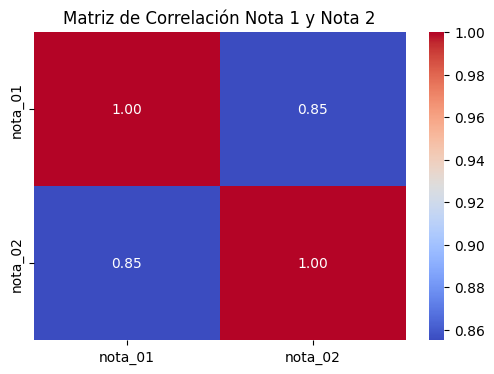

In [94]:
correlation_matrix = dfav[['nota_01', 'nota_02']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Matriz de Correlación Nota 1 y Nota 2")

plt.show()


#Selección de variables

Durante el proceso de preparacion de los datos se argumentaron las razones por las cuales se dejaran algunas variables y se excluirán otras. A continuación dividimos el dataset entre variables predictoras y variable a predecir basados en esto.

In [95]:
y_target = dfav['nota_03']
X_features = dfav.drop(['edad', 'padres_status', 't_familia', 't_examen', 'soporte_edu_extra', 'soporte_edu_fam', 'monitores',
                      'preuniversitario','postgrado','relacion_sen','salir_amigos','salud','ausencias','nota_03'], axis=1, inplace=False)

In [96]:
X_features

,departamento,sexo,direccion,madre_edu,padre_edu,madre_trab,padre_trab,razon,guardian,t_estudio,faltas,actividades_extra,internet,relacion_fam,tiempo_libre,cons_alcohol_sem,cons_alcohol_finde,nota_01,nota_02,padres_edu
0,II,M,U,4,4,en_casa,profesor,habilidad,madre,2,0,no,no,4,3,1,1,0,11,4.0
1,II,M,U,1,1,en_casa,otro,habilidad,padre,2,0,no,si,5,3,1,1,9,11,1.0
2,II,M,U,1,1,en_casa,otro,otro,madre,2,0,no,si,4,3,2,3,12,13,1.0
3,II,M,U,4,2,salud,servicios,recomendacion,madre,3,0,si,si,3,2,1,1,14,14,3.0
4,II,M,U,3,3,otro,otro,recomendacion,padre,2,0,no,no,4,3,1,2,11,13,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,MS,M,U,1,1,otro,otro,habilidad,madre,2,0,si,no,1,1,1,1,11,12,1.0
647,MS,H,U,3,1,servicios,servicios,habilidad,madre,1,0,no,si,2,4,3,4,10,10,2.0
648,MS,H,R,3,2,servicios,otro,habilidad,madre,1,0,no,si,4,4,3,4,10,11,2.5
649,II,M,U,4,4,en_casa,profesor,habilidad,madre,2,0,no,no,4,3,1,1,0,11,4.0


In [97]:
X_features.columns.values

array(['departamento', 'sexo', 'direccion', 'madre_edu', 'padre_edu',
       'madre_trab', 'padre_trab', 'razon', 'guardian', 't_estudio',
       'faltas', 'actividades_extra', 'internet', 'relacion_fam',
       'tiempo_libre', 'cons_alcohol_sem', 'cons_alcohol_finde',
       'nota_01', 'nota_02', 'padres_edu'], dtype=object)

#Transformación de variables#

Vimos que hay tres variables que podemos simplificar en una sola mediante un promedio, ya sea porque transmiten información del mismo tipo y/o para evitar problemas de multicolinealidad.

In [98]:
# Educación padre y madre
X_features['padres_edu'] = (X_features['madre_edu'] + X_features['padre_edu']) / 2

# Consumo de alcohol fines de semana y entre semana
X_features['cons_alcohol'] = (X_features['cons_alcohol_sem'] + X_features['cons_alcohol_finde']) / 2

# Promedio acumulado nota 1 y nota 2
X_features['promedio_acumulado'] = (X_features['nota_01'] + X_features['nota_02']) / 2


In [99]:
X_features

,departamento,sexo,direccion,madre_edu,padre_edu,madre_trab,padre_trab,razon,guardian,t_estudio,faltas,actividades_extra,internet,relacion_fam,tiempo_libre,cons_alcohol_sem,cons_alcohol_finde,nota_01,nota_02,padres_edu,cons_alcohol,promedio_acumulado
0,II,M,U,4,4,en_casa,profesor,habilidad,madre,2,0,no,no,4,3,1,1,0,11,4.0,1.0,5.5
1,II,M,U,1,1,en_casa,otro,habilidad,padre,2,0,no,si,5,3,1,1,9,11,1.0,1.0,10.0
2,II,M,U,1,1,en_casa,otro,otro,madre,2,0,no,si,4,3,2,3,12,13,1.0,2.5,12.5
3,II,M,U,4,2,salud,servicios,recomendacion,madre,3,0,si,si,3,2,1,1,14,14,3.0,1.0,14.0
4,II,M,U,3,3,otro,otro,recomendacion,padre,2,0,no,no,4,3,1,2,11,13,3.0,1.5,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,MS,M,U,1,1,otro,otro,habilidad,madre,2,0,si,no,1,1,1,1,11,12,1.0,1.0,11.5
647,MS,H,U,3,1,servicios,servicios,habilidad,madre,1,0,no,si,2,4,3,4,10,10,2.0,3.5,10.0
648,MS,H,R,3,2,servicios,otro,habilidad,madre,1,0,no,si,4,4,3,4,10,11,2.5,3.5,10.5
649,II,M,U,4,4,en_casa,profesor,habilidad,madre,2,0,no,no,4,3,1,1,0,11,4.0,1.0,5.5


Después de realizar la transformación de variables y unir aquellas que consideramos pueden simplificarse en una sola, eliminamos las variables individuales.

In [100]:
X_features = X_features.drop(['madre_edu', 'padre_edu', 'cons_alcohol_sem', 'cons_alcohol_finde', 'nota_01', 'nota_02'], axis=1, inplace=False)

In [101]:
X_features

,departamento,sexo,direccion,madre_trab,padre_trab,razon,guardian,t_estudio,faltas,actividades_extra,internet,relacion_fam,tiempo_libre,padres_edu,cons_alcohol,promedio_acumulado
0,II,M,U,en_casa,profesor,habilidad,madre,2,0,no,no,4,3,4.0,1.0,5.5
1,II,M,U,en_casa,otro,habilidad,padre,2,0,no,si,5,3,1.0,1.0,10.0
2,II,M,U,en_casa,otro,otro,madre,2,0,no,si,4,3,1.0,2.5,12.5
3,II,M,U,salud,servicios,recomendacion,madre,3,0,si,si,3,2,3.0,1.0,14.0
4,II,M,U,otro,otro,recomendacion,padre,2,0,no,no,4,3,3.0,1.5,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,MS,M,U,otro,otro,habilidad,madre,2,0,si,no,1,1,1.0,1.0,11.5
647,MS,H,U,servicios,servicios,habilidad,madre,1,0,no,si,2,4,2.0,3.5,10.0
648,MS,H,R,servicios,otro,habilidad,madre,1,0,no,si,4,4,2.5,3.5,10.5
649,II,M,U,en_casa,profesor,habilidad,madre,2,0,no,no,4,3,4.0,1.0,5.5


In [102]:
X_features.columns.values

array(['departamento', 'sexo', 'direccion', 'madre_trab', 'padre_trab',
       'razon', 'guardian', 't_estudio', 'faltas', 'actividades_extra',
       'internet', 'relacion_fam', 'tiempo_libre', 'padres_edu',
       'cons_alcohol', 'promedio_acumulado'], dtype=object)

**Encoders**

Debemos implementar una función que nos permita ingresar al modelo variables categóricas mediante una transformación de las mismas.

In [103]:
X_features = pd.get_dummies(X_features)

In [104]:
X_features.loc[163]

t_estudio                1.0
faltas                   2.0
relacion_fam             2.0
tiempo_libre             3.0
padres_edu               1.0
cons_alcohol             3.5
promedio_acumulado      10.0
departamento_II          1.0
departamento_MS          0.0
sexo_H                   1.0
sexo_M                   0.0
direccion_R              0.0
direccion_U              1.0
madre_trab_en_casa       0.0
madre_trab_otro          1.0
madre_trab_profesor      0.0
madre_trab_salud         0.0
madre_trab_servicios     0.0
padre_trab_en_casa       0.0
padre_trab_otro          1.0
padre_trab_profesor      0.0
padre_trab_salud         0.0
padre_trab_servicios     0.0
razon_habilidad          1.0
razon_otro               0.0
razon_recomendacion      0.0
razon_reputacion         0.0
guardian_madre           1.0
guardian_otro            0.0
guardian_padre           0.0
actividades_extra_no     1.0
actividades_extra_si     0.0
internet_no              0.0
internet_si              1.0
Name: 163, dty

**Escalado**

Creamos una función para realizar el escalado de las variables numéricas y evitar que el modelo sea muy sensible a diferentes escalas numéricas.

In [105]:
# Función para realizar escalado de variables
def escalado(dataframe, column):
  dataframe[column] = (dataframe[column] - dataframe[column].min())/(dataframe[column].max() - dataframe[column].min())

In [106]:
escalado(X_features, 't_estudio')
escalado(X_features, 'faltas')
escalado(X_features, 'relacion_fam')
escalado(X_features, 'tiempo_libre')
escalado(X_features, 'padres_edu')
escalado(X_features, 'cons_alcohol')
escalado(X_features, 'promedio_acumulado')

X_features

,t_estudio,faltas,relacion_fam,tiempo_libre,padres_edu,cons_alcohol,promedio_acumulado,departamento_II,departamento_MS,sexo_H,sexo_M,direccion_R,direccion_U,madre_trab_en_casa,madre_trab_otro,madre_trab_profesor,madre_trab_salud,madre_trab_servicios,padre_trab_en_casa,padre_trab_otro,padre_trab_profesor,padre_trab_salud,padre_trab_servicios,razon_habilidad,razon_otro,razon_recomendacion,razon_reputacion,guardian_madre,guardian_otro,guardian_padre,actividades_extra_no,actividades_extra_si,internet_no,internet_si
0,0.333333,0.0,0.75,0.50,1.000,0.000,0.212121,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0.333333,0.0,1.00,0.50,0.250,0.000,0.484848,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1
2,0.333333,0.0,0.75,0.50,0.250,0.375,0.636364,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
3,0.666667,0.0,0.50,0.25,0.750,0.000,0.727273,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1
4,0.333333,0.0,0.75,0.50,0.750,0.125,0.606061,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,0.333333,0.0,0.00,0.00,0.250,0.000,0.575758,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0
647,0.000000,0.0,0.25,0.75,0.500,0.625,0.484848,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1
648,0.000000,0.0,0.75,0.75,0.625,0.625,0.515152,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1
649,0.333333,0.0,0.75,0.50,1.000,0.000,0.212121,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0


#División del dataset y modelo de regresión lineal#

In [107]:
X_features.shape

(651, 34)

Ahora realizamos la división del dataset en train y test, destinando un 70% de los datos para training y un 30% para testing.

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state = 156)

In [109]:
X_test

,t_estudio,faltas,relacion_fam,tiempo_libre,padres_edu,cons_alcohol,promedio_acumulado,departamento_II,departamento_MS,sexo_H,sexo_M,direccion_R,direccion_U,madre_trab_en_casa,madre_trab_otro,madre_trab_profesor,madre_trab_salud,madre_trab_servicios,padre_trab_en_casa,padre_trab_otro,padre_trab_profesor,padre_trab_salud,padre_trab_servicios,razon_habilidad,razon_otro,razon_recomendacion,razon_reputacion,guardian_madre,guardian_otro,guardian_padre,actividades_extra_no,actividades_extra_si,internet_no,internet_si
163,0.000000,0.666667,0.25,0.50,0.250,0.625,0.484848,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1
633,0.333333,0.000000,1.00,0.75,1.000,0.625,0.696970,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1
140,0.333333,0.000000,1.00,0.75,0.875,0.500,0.454545,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0
434,1.000000,0.000000,0.00,0.25,0.500,0.000,0.454545,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0
617,0.666667,0.000000,1.00,0.50,0.250,0.000,0.969697,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,0.333333,0.666667,0.75,0.50,0.375,0.000,0.303030,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0
585,0.666667,0.000000,0.75,0.25,0.500,0.250,0.333333,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
160,0.333333,0.000000,0.25,0.50,0.375,0.500,0.545455,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0
571,0.000000,1.000000,0.75,0.75,0.375,0.250,0.393939,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1


**Modelos**

Implementamos un modelo de regresión lineal múltiple que nos permita predecir las notas del examen 3 de los estudiantes.

> Bloc con sangría



In [110]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

Generamos las predicciones para el conjunto de datos de testing, es decir, aquellos que no tienen la variable objetivo como etiqueta, para posteriormente evaluar con la variable real (observada).

**train**

In [111]:
lr_pred = lr_reg.predict(X_train)

In [112]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_train, lr_pred))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_train, lr_pred)))
print("MAE: %.2f" % mean_absolute_error(y_train, lr_pred))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_train, lr_pred))
print("R2: %.2f" % r2_score(y_train, lr_pred))

# R2 ajustado
r2 = r2_score(y_train, lr_pred)
adj_r2 = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 1.59
RMSE 1.26
MAE: 0.85
MAPE: 514542443690303.56
R2: 0.85
R2-adjusted: 0.84


**Test**

In [113]:
lr_pred = lr_reg.predict(X_test)
lr_pred

array([10.5     , 13.796875,  9.671875, 10.      , 19.0625  , 10.546875,
       16.421875, 11.46875 , 12.015625, 10.640625, 12.59375 , 14.390625,
       16.734375, 10.4375  , 11.734375, 11.703125, 14.515625, 10.578125,
       17.640625, 10.78125 , 13.015625, 10.859375,  9.875   ,  8.21875 ,
        9.953125,  6.265625,  8.03125 , 12.359375, 15.21875 , 15.171875,
        9.171875, 19.40625 , 12.59375 , 13.8125  , 12.640625, 13.9375  ,
       12.109375, 15.234375, 10.171875,  7.765625, 13.234375, 12.328125,
        7.96875 , 10.5625  ,  8.484375, 15.109375, 13.921875, 15.296875,
       15.171875, 12.421875, 12.984375, 10.40625 , 11.734375, 11.109375,
        6.796875,  9.828125, 12.1875  , 14.53125 ,  8.671875, 12.078125,
       15.296875, 10.328125, 10.390625, 15.359375, 12.375   ,  7.15625 ,
       12.34375 , 18.265625, 13.84375 , 10.09375 ,  9.546875, 13.234375,
       14.25    , 11.515625, 12.75    , 11.546875, 13.140625, 17.65625 ,
        7.578125,  9.5     , 13.078125, 11.359375, 

Finalmente obtenemos las métricas de desempeño del modelo.

In [114]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, lr_pred))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, lr_pred)))
print("MAE: %.2f" % mean_absolute_error(y_test, lr_pred))
print("MAPE: %.f" % mean_absolute_percentage_error(y_test, lr_pred))
print("R2: %.2f" % r2_score(y_test, lr_pred))

# R2 ajustado
r2 = r2_score(y_test, lr_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 2.54
RMSE 1.59
MAE: 0.97
MAPE: 615367487349572
R2: 0.75
R2-adjusted: 0.70


Vamos a definir como métrica de desempeño el R2-ajustado ya que no aumenta a medida que más variables se le agreguen al modelo.

Basados en esta métrica, podemos concluir que las variables predictoras explican el 70% la variabilidad de la variable objetivo. Es decir, las variables seleccionadas explican en un 70% de los casos el resultado final del examen 3.

Tambien observamos que las metricas desmejoraron comparadas con el entrenamiento, sin embargo este es un comportamiento que podriamos esperar ya que el modelo puede adaptarse mejor a las variables de entrenamiento, las aprende mejor y al ingresarle nuevos datos es un poco menos acertado

In [115]:
resultados = pd.DataFrame(lr_pred)
resultados.rename(columns={0:'Predicción'},inplace=True)
resultados

condicion_ganar = resultados['Predicción'] >= 12
condicion_perder = resultados['Predicción'] < 12

resultados.loc[condicion_ganar, 'Condición_academica'] = 'Ganó'
resultados.loc[condicion_perder,'Condición_academica'] = 'Perdió'
display(resultados)

,Predicción,Condición_academica
0,10.500000,Perdió
1,13.796875,Ganó
2,9.671875,Perdió
3,10.000000,Perdió
4,19.062500,Ganó
...,...,...
191,7.046875,Perdió
192,8.234375,Perdió
193,11.953125,Perdió
194,8.750000,Perdió


In [116]:
base = resultados.groupby(['Condición_academica'])['Predicción'].count().reset_index().sort_values('Predicción', ascending = False).rename(columns ={'Predicción':'count'})

cant_ed = resultados['Condición_academica'].count()

# hacer la gráfica
fig = px.pie(base , values = 'count', names = 'Condición_academica', title = '<b>Condición académica<b>',
             hole = .5)

# poner detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    legend_title = '<b>Condición<b>',
    title_x = 0.5,
    annotations = [dict(text = 'Muestras:<br>'+str(cant_ed), x=0.5, y = 0.5, font_size = 20, showarrow = False)])

fig.show()

A partir de nuestro modelo predictivo para una muestra de 196 estudiantes, el 50.5% ganan la materia de Álgebra Lineal.

#División del dataset y modelo de regresión lineal con las variables originales de la base de datos#

In [117]:
#Utilizamos pandas para leer el dataset importado desde Github
dfavcompleta = pd.read_csv(urlalv, index_col=[0])
dfavcompleta.head(3)

,departamento,sexo,edad,direccion,t_familia,padres_status,madre_edu,padre_edu,madre_trab,padre_trab,razon,guardian,t_examen,t_estudio,faltas,soporte_edu_extra,soporte_edu_fam,monitores,actividades_extra,preuniversitario,postgrado,internet,relacion_sen,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud,ausencias,nota_01,nota_02,nota_03
0,II,M,18,U,mayor_3,S,4,4,en_casa,profesor,habilidad,madre,2,2,0,si,no,no,no,si,si,no,no,4,3,4,1,1,3,4,0,11,11
1,II,M,17,U,mayor_3,J,1,1,en_casa,otro,habilidad,padre,1,2,0,no,si,no,no,no,si,yes,no,5,3,3,1,1,3,2,9,11,11
2,II,M,15,U,menor_e3,J,1,1,en_casa,otro,otro,madre,1,2,0,si,no,no,no,si,si,yes,no,4,3,2,2,3,3,6,12,13,12


**Encoders**

In [118]:
X_featuresc = dfavcompleta.drop(['nota_03'], axis=1, inplace=False)
X_featuresc

,departamento,sexo,edad,direccion,t_familia,padres_status,madre_edu,padre_edu,madre_trab,padre_trab,razon,guardian,t_examen,t_estudio,faltas,soporte_edu_extra,soporte_edu_fam,monitores,actividades_extra,preuniversitario,postgrado,internet,relacion_sen,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud,ausencias,nota_01,nota_02
0,II,M,18,U,mayor_3,S,4,4,en_casa,profesor,habilidad,madre,2,2,0,si,no,no,no,si,si,no,no,4,3,4,1,1,3,4,0,11
1,II,M,17,U,mayor_3,J,1,1,en_casa,otro,habilidad,padre,1,2,0,no,si,no,no,no,si,yes,no,5,3,3,1,1,3,2,9,11
2,II,M,15,U,menor_e3,J,1,1,en_casa,otro,otro,madre,1,2,0,si,no,no,no,si,si,yes,no,4,3,2,2,3,3,6,12,13
3,II,M,15,U,mayor_3,J,4,2,salud,servicios,recomendacion,madre,1,3,0,no,si,no,si,si,si,yes,yes,3,2,2,1,1,5,0,14,14
4,II,M,16,U,mayor_3,J,3,3,otro,otro,recomendacion,padre,1,2,0,no,si,no,no,si,si,no,no,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,MS,M,18,U,mayor_3,J,1,1,otro,otro,habilidad,madre,2,2,0,no,no,no,si,si,si,no,no,1,1,1,1,1,5,6,11,12
647,MS,H,17,U,menor_e3,J,3,1,servicios,servicios,habilidad,madre,2,1,0,no,no,no,no,no,si,yes,no,2,4,5,3,4,2,6,10,10
648,MS,H,18,R,menor_e3,J,3,2,servicios,otro,habilidad,madre,3,1,0,no,no,no,no,no,si,yes,no,4,4,1,3,4,5,4,10,11
649,II,M,18,U,mayor_3,S,4,4,en_casa,profesor,habilidad,madre,2,2,0,si,no,no,no,si,si,no,no,4,3,4,1,1,3,4,0,11


In [119]:
X_featuresc=pd.get_dummies(X_featuresc)

**Escalado**

In [120]:
escalado(X_featuresc, 't_estudio')
escalado(X_featuresc, 'faltas')
escalado(X_featuresc, 'relacion_fam')
escalado(X_featuresc, 'tiempo_libre')
escalado(X_featuresc, 'madre_edu')
escalado(X_featuresc, 'padre_edu')
escalado(X_featuresc, 'cons_alcohol_finde')
escalado(X_featuresc, 'cons_alcohol_sem')
escalado(X_featuresc, 'nota_01')
escalado(X_featuresc, 'nota_02')
X_featuresc

,edad,madre_edu,padre_edu,t_examen,t_estudio,faltas,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud,ausencias,nota_01,nota_02,departamento_II,departamento_MS,sexo_H,sexo_M,direccion_R,direccion_U,t_familia_mayor_3,t_familia_menor_e3,padres_status_J,padres_status_S,madre_trab_en_casa,madre_trab_otro,madre_trab_profesor,madre_trab_salud,madre_trab_servicios,padre_trab_en_casa,padre_trab_otro,padre_trab_profesor,padre_trab_salud,padre_trab_servicios,razon_habilidad,razon_otro,razon_recomendacion,razon_reputacion,guardian_madre,guardian_otro,guardian_padre,soporte_edu_extra_no,soporte_edu_extra_si,soporte_edu_fam_no,soporte_edu_fam_si,monitores_no,monitores_si,actividades_extra_no,actividades_extra_si,preuniversitario_no,preuniversitario_si,postgrado_no,postgrado_si,internet_no,internet_yes,relacion_sen_no,relacion_sen_yes
0,18,1.00,1.00,2,0.333333,0.0,0.75,0.50,4,0.00,0.00,3,4,0.000000,0.578947,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,0.25,0.25,1,0.333333,0.0,1.00,0.50,3,0.00,0.00,3,2,0.473684,0.578947,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,0.25,0.25,1,0.333333,0.0,0.75,0.50,2,0.25,0.50,3,6,0.631579,0.684211,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
3,15,1.00,0.50,1,0.666667,0.0,0.50,0.25,2,0.00,0.00,5,0,0.736842,0.736842,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
4,16,0.75,0.75,1,0.333333,0.0,0.75,0.50,2,0.00,0.25,5,0,0.578947,0.684211,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,18,0.25,0.25,2,0.333333,0.0,0.00,0.00,1,0.00,0.00,5,6,0.578947,0.631579,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0
647,17,0.75,0.25,2,0.000000,0.0,0.25,0.75,5,0.50,0.75,2,6,0.526316,0.526316,0,1,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0
648,18,0.75,0.50,3,0.000000,0.0,0.75,0.75,1,0.50,0.75,5,4,0.526316,0.578947,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0
649,18,1.00,1.00,2,0.333333,0.0,0.75,0.50,4,0.00,0.00,3,4,0.000000,0.578947,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0


In [121]:
y_targetc = dfavcompleta['nota_03']

Ahora realizamos la división del dataset en train y test, destinando un 70% de los datos para training y un 30% para testing.

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_featuresc, y_targetc, test_size = 0.3, random_state = 156)

In [123]:
X_test

,edad,madre_edu,padre_edu,t_examen,t_estudio,faltas,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud,ausencias,nota_01,nota_02,departamento_II,departamento_MS,sexo_H,sexo_M,direccion_R,direccion_U,t_familia_mayor_3,t_familia_menor_e3,padres_status_J,padres_status_S,madre_trab_en_casa,madre_trab_otro,madre_trab_profesor,madre_trab_salud,madre_trab_servicios,padre_trab_en_casa,padre_trab_otro,padre_trab_profesor,padre_trab_salud,padre_trab_servicios,razon_habilidad,razon_otro,razon_recomendacion,razon_reputacion,guardian_madre,guardian_otro,guardian_padre,soporte_edu_extra_no,soporte_edu_extra_si,soporte_edu_fam_no,soporte_edu_fam_si,monitores_no,monitores_si,actividades_extra_no,actividades_extra_si,preuniversitario_no,preuniversitario_si,postgrado_no,postgrado_si,internet_no,internet_yes,relacion_sen_no,relacion_sen_yes
163,18,0.25,0.25,1,0.000000,0.666667,0.25,0.50,5,0.25,1.00,4,0,0.578947,0.473684,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1
633,18,1.00,1.00,1,0.333333,0.000000,1.00,0.75,3,0.50,0.75,2,1,0.684211,0.736842,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0
140,17,0.75,1.00,3,0.333333,0.000000,1.00,0.75,5,0.25,0.75,5,2,0.526316,0.473684,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0
434,16,0.50,0.50,2,1.000000,0.000000,0.00,0.25,1,0.00,0.00,1,4,0.526316,0.473684,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1
617,18,0.25,0.25,2,0.666667,0.000000,1.00,0.50,2,0.00,0.00,4,0,1.000000,0.894737,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,18,0.25,0.50,2,0.333333,0.666667,0.75,0.50,3,0.00,0.00,5,2,0.315789,0.421053,0,1,0,1,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0
585,17,0.75,0.25,2,0.666667,0.000000,0.75,0.25,3,0.25,0.25,3,5,0.421053,0.368421,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0
160,15,0.25,0.50,1,0.333333,0.000000,0.25,0.50,4,0.25,0.75,1,6,0.578947,0.578947,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1
571,19,0.50,0.25,2,0.000000,1.000000,0.75,0.75,3,0.00,0.50,5,4,0.421053,0.473684,0,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1


**Modelo**

Implementamos un modelo de regresión lineal múltiple que nos permita predecir las notas del examen 3 de los estudiantes.

In [124]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

Generamos las predicciones para el conjunto de datos de testing, es decir, aquellos que no tienen la variable objetivo como etiqueta, para posteriormente evaluar con la variable real (observada).

**train**

In [125]:
lr_pred = lr_reg.predict(X_train)

In [126]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_train, lr_pred))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_train, lr_pred)))
print("MAE: %.2f" % mean_absolute_error(y_train, lr_pred))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_train, lr_pred))
print("R2: %.2f" % r2_score(y_train, lr_pred))

# R2 ajustado
r2 = r2_score(y_train, lr_pred)
adj_r2 = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 1.24
RMSE 1.12
MAE: 0.74
MAPE: 366979353467116.31
R2: 0.88
R2-adjusted: 0.86


**Test**

In [127]:
lr_pred = lr_reg.predict(X_test)
lr_pred

array([ 9.52077082, 13.79710267,  9.45992792,  9.76791935, 17.84007531,
       10.76068098, 17.25831402, 11.17603181, 12.43772678,  9.72474577,
       11.19615355, 14.14874784, 16.83859536, 10.55744462, 11.19321481,
       12.01160914, 14.75003541,  9.55452611, 18.19155113, 10.16137201,
       13.19156503, 12.02170339, 10.0888268 ,  8.09952959,  9.82038893,
        7.65761233,  7.85912279, 12.09448643, 14.42011383, 14.63687507,
        9.15217812, 19.5334767 , 12.53997186, 12.67838158, 12.6901854 ,
       14.31560971, 12.64539187, 15.27216576, 10.10030903,  8.04497604,
       13.14900479, 12.18473528,  8.15276177, 10.79026174,  9.14353685,
       15.39524719, 13.04141563, 15.40077562, 15.66228252, 12.19964751,
       12.64832585, 11.24357357, 12.34834579, 11.8066239 ,  7.02035423,
        9.79024814, 11.79895637, 14.40540768,  8.77058582, 11.29494569,
       15.54332655, 10.65799051, 11.24388682, 15.17822634, 12.26715416,
        8.31151258, 12.03253416, 18.32670592, 15.19073714,  9.74

In [128]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, lr_pred))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, lr_pred)))
print("MAE: %.2f" % mean_absolute_error(y_test, lr_pred))
print("MAPE: %.f" % mean_absolute_percentage_error(y_test, lr_pred))
print("R2: %.2f" % r2_score(y_test, lr_pred))

# R2 ajustado
r2 = r2_score(y_test, lr_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 2.13
RMSE 1.46
MAE: 0.87
MAPE: 523268394733801
R2: 0.79
R2-adjusted: 0.71


Basados en el R2 ajustado como mencionamos anteriormente, podemos concluir que las variables predictoras explican el 71% la variabilidad de la variable objetivo. Es decir, las variables seleccionadas explican en un 71% de los casos el resultado final del examen 3, un poco mejor que el modelo con las transformaciones, pero debemos recordar que en el analisis vimos algunas variables como nota 1 y nota 2 con una alta correlacion lo que nos indica que podría haber problemas de mulcolinealidad, por ello el modelo anterior con transformaciones seria una mejor opcion